In [1]:
# Importing Required libraies
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Laoding Data of cars from all the cities, collected from CarDekho.com

ahmedabad=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Ahmedabad.csv')
mumbai=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Mumbai.csv')
banglore=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Banglore.csv')
gurgaon=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Gurgaon.csv')
Jaipur=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Jaipur.csv')
Hyderabad=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Hyderabad.csv')
Pune=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Pune.csv')
Kolkata=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Kolkata.csv')
Chennai=pd.read_csv('D:\python\Assigments\Car_Price_Prediction\Chennai.csv') 

In [3]:
#Checkign the shape
print(Jaipur.shape)

print(ahmedabad.shape)

print (mumbai.shape)

print(banglore.shape)

print(gurgaon.shape)

print(Hyderabad.shape)

print(Pune.shape)

print(Kolkata.shape)

print(Chennai.shape)

(438, 21)
(450, 21)
(648, 21)
(500, 21)
(1005, 21)
(675, 21)
(240, 21)
(611, 21)
(630, 21)


In [4]:
# Making a list of data to concatinate
Frames=[ahmedabad,mumbai, banglore, gurgaon, Jaipur, Hyderabad, Pune, Kolkata, Chennai]

In [5]:
# Storing all the car data in 
data=pd.concat(Frames)

In [6]:
data.head(3)

,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price
0,0,2020 Maruti Swift Dzire,2019,Petrol,"11,935 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,Grey,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,80,000"
1,1,2016 Nissan Terrano,2016,Diesel,"74,555 Kms",1461 cc,2nd Owner,Manual,20.45 kmpl,83.8bhp,...,5,Black,5 Speed,FWD,Power,Disc,Drum,14 Seconds,K9K Diesel Engine,"4,70,500"
2,2,2020 Maruti Swift Dzire,2019,Petrol,"9,379 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,White,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,75,000"


In [7]:
# Set_option to see Maximum columns
pd.set_option('display.max_columns', None)
# Set_option to see Maximum Rows
pd.set_option('display.max_rows', None)

## Data Cleaning 

### In this Step we will clean our data and make it suitable for model building.

### 1.Droping Unnamed: 0 column from the data

In [8]:
# Drope the Unnamed: 0 column from the data
data .drop('Unnamed: 0', axis= 1, inplace = True)

In [9]:
# Making a backup copy of the data
backup= data.copy()

In [10]:
# First reset index for the data
df=data.reset_index(drop=True)

In [11]:
df.shape

(5197, 20)

### 2. Lets Check the Name colums and extract only the name

In [12]:
# Checking the Unique Values in name column 
df['Brand'].value_counts()

Maruti Wagon R VXI                                        49
2016 Hyundai Grand i10                                    34
2015 Hyundai Grand i10                                    33
2014 Maruti Swift                                         32
2018 Renault KWID                                         29
2018 Hyundai i20                                          28
2017 Hyundai Grand i10                                    28
Maruti Alto 800 LXI                                       27
2015 Maruti Swift                                         27
2017 Hyundai i20                                          26
2017 Maruti Baleno                                        25
2013 Hyundai i10                                          25
2018 Maruti Baleno                                        25
2016 Maruti Swift                                         24
2014 Hyundai Grand i10                                    23
Maruti Alto LXi                                           23
Maruti Swift VDI        

In [13]:
df['Brand']=df['Brand'].str.split(' ').str.slice(0,4).str.join(' ')

#### Checking Unique values present in Year

In [14]:
df['Make_Year'].value_counts()

2017    678
2015    664
2016    633
2018    622
2014    524
2013    497
2012    366
2011    309
2019    304
2020    145
2010    139
2008     94
2009     76
2007     55
2021     43
2006     17
2005     11
2004     10
2000      4
2003      3
2002      2
1995      1
Name: Make_Year, dtype: int64

In [15]:
# Changing Value into
df['Make_Year']=df['Make_Year'].astype(int)

In [16]:
df['Make_Year'].dtype

dtype('int32')

In [17]:
# Checkign Value counts and Unique values present in the Fuel Columns
df['Fuel'].value_counts()

Petrol      3030
Diesel      2132
CNG           18
LPG           16
Electric       1
Name: Fuel, dtype: int64

In [18]:
df['Fuel']=df['Fuel'].astype(str)

#### Removing Kms from KMs_Driven and lets check the unique values

In [19]:
# Checkign Value count 
df['KMs_Driven'].value_counts()

60,000 kms       58
70,000 kms       55
40,000 kms       49
65,000 kms       48
80,000 kms       47
75,000 kms       47
50,000 kms       43
55,000 kms       41
45,000 kms       38
42,000 kms       35
30,000 kms       34
1,20,000 kms     34
35,000 kms       32
90,000 kms       28
25,000 kms       27
51,000 kms       27
48,000 kms       27
72,000 kms       24
49,000 kms       24
38,000 kms       23
44,000 kms       22
28,000 kms       21
15,000 kms       20
68,000 kms       20
41,000 kms       20
54,000 kms       20
69,000 kms       19
10,000 kms       19
43,000 kms       18
20,000 kms       18
24,000 kms       18
62,000 kms       18
39,000 kms       18
33,000 kms       17
36,000 kms       17
18,000 kms       17
32,000 kms       17
34,000 kms       17
56,000 kms       16
1,00,000 kms     16
78,000 kms       16
14,000 kms       16
85,000 kms       15
76,000 kms       15
5,000 kms        15
1,10,000 kms     14
29,000 kms       14
59,000 kms       14
74,000 kms       14
82,000 kms       14


In [20]:
# We can see Two format as kms and Kms, we will replace it one by one, we also replace comma and change the type to intiger
df['KMs_Driven']= df['KMs_Driven'].str.replace('kms','')
df['KMs_Driven']= df['KMs_Driven'].str.replace('Kms','')
df['KMs_Driven']= df['KMs_Driven'].str.replace(',','').astype(int)

In [21]:
df['KMs_Driven'].head()

0    11935
1    74555
2     9379
3    31824
4    49072
Name: KMs_Driven, dtype: int32

#### Check Unique values in Engine_Displacement and remove irrelevent parts.

In [22]:
# Checkign Unique Values 
df['Engine_Displacement'].unique()

array(['1197 cc', '1461 cc', '1248 cc', '998 cc', '2494 cc', '1497 cc',
       '1248 CC', '1399 CC', '1396 CC', '1498 cc', '1196 cc', '1582 cc',
       '1197 CC', '998 CC', '1198 CC', '1582 CC', '1995 CC', '1497 CC',
       '1373 CC', '2496 CC', '1498 CC', '2143 CC', '1364 CC', '2755 CC',
       '2967 CC', '999 CC', '796 CC', '1968 CC', '1086 CC', '2494 CC',
       '1956 CC', '1598 CC', '1199 CC', '2179 CC', '1991 CC', '814 CC',
       '2982 CC', '3198 CC', '799 CC', '1461 CC', '2523 CC', '1451 CC',
       '2498 CC', '1591 CC', '2393 CC', '2359 CC', '1798 CC', '2184 CC',
       '1186 CC', '2696 CC', '2354 CC', '2993 CC', '1493 CC', '1984 CC',
       '1196 CC', '1499 CC', '1997 CC', '1999 CC', '1061 CC', '1496 CC',
       '2199 CC', '1462 CC', '1799 CC', '1368 CC', '1298 CC', '995 CC',
       '1495 CC', '1950 CC', '1405 CC', '2149 CC', '1198 cc', '1496 cc',
       '1396 cc', '814 cc', '999 cc', '1086 cc', '1998 CC', '796 cc',
       '799 cc', '1199 cc', '1499 cc', '1373 cc', '1298 cc', 

In [23]:
# We can see two type as CC and cc, other type of data like 'white' and 17 x 7.5J' also present 

In [24]:
# Removing cc  and CC from Engine_Displacement 
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('cc', '')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('CC', '')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('White', '1194')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('Grey', '1194')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('17 x 7.5J', '1194')

In [25]:
# Chnaging Type To integer
df['Engine_Displacement']=df['Engine_Displacement'].astype(int)

In [26]:
df['Engine_Displacement'].head()

0    1197
1    1461
2    1197
3    1248
4    1197
Name: Engine_Displacement, dtype: int32

#### Lets Remove Owner, Ist , 2nd etc 

In [27]:
# Checkign Unique values
df['No_Of_Owner'].unique()

array(['1st Owner', '2nd Owner', 'First Owner', 'Second Owner',
       'Third Owner', 'Fourth & Above Owner', '3rd Owner',
       'Test Drive Car'], dtype=object)

In [28]:
# We can see '1st Owner' == 'First Owner', '2nd Owner'=='Second Owner', '3rd Owner'=='Third Owner' , lets replace
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('1st Owner','First Owner')
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('2nd Owner','Second Owner')
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('3rd Owner','Third Owner')

In [29]:
# Removing Owner also from First , second and  third owner
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('Owner','')

#### Lets check the Transmission type

In [30]:
# Checkinf Unique Values
df['Transmission'].unique()

array(['Manual', 'Automatic', 'KA53', 'KA01', 'KA05', 'KA04', 'KA03',
       'KA02', 'KA09', 'KA51', 'MH04', 'MH02', 'MH03', 'MH47', 'MH05',
       'MH43', 'MH01', 'DL9C', 'DL2C', 'DL1C', 'HR87', 'UP16', 'HR51',
       'DL8C', 'HR29', 'DL10', 'DL7C', 'HR10', 'HR77', 'DL6C', 'DL12',
       'RJ23', 'RJ14', 'TS08', 'AP23', 'AP09', 'TS10', 'MH12', 'MH11'],
      dtype=object)

In [31]:
# We have RTO Information available in some rows. lets remove and replace it with Manual Type
list1= ['KA53', 'KA01', 'KA05', 'KA04', 'KA03',
       'KA02', 'KA09', 'KA51', 'MH04', 'MH02', 'MH03', 'MH47', 'MH05',
       'MH43', 'MH01', 'DL9C', 'DL2C', 'DL1C', 'HR87', 'UP16', 'HR51',
       'DL8C', 'HR29', 'DL10', 'DL7C', 'HR10', 'HR77', 'DL6C', 'DL12',
       'RJ23', 'RJ14', 'TS08', 'AP23', 'AP09', 'TS10', 'MH12', 'MH11']

In [32]:
#Replacing list1 value with manual
df['Transmission'].replace(to_replace =list1, value ="Manual", inplace=True)

In [33]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
# Now we have only Two type of values

#### Lets chech the Mileage column 

In [35]:
#Checkign Unique values present in the Mileage column
df['Mileage'].unique()

array(['21.21 kmpl', '20.45 kmpl', '28.4 kmpl', '21.01 kmpl',
       '21.79 kmpl', '23.4 kmpl', '12.99 kmpl', '20.4 kmpl', '17.4 kmpl',
       '26.59 kmpl', '20.51 kmpl', '25.2 kmpl', '20.0 kmpl', '25.1 kmpl',
       '21.19 kmpl', '23.0 kmpl', '19.3 kmpl', '22.27 kmpl', '16.11 kmpl',
       '21.7 kmpl', '22.32 kmpl', '21.4 kmpl', '22.9 kmpl', '19.4 kmpl',
       '17.01 kmpl', '20.68 kmpl', '22.3 kmpl', '23.95 kmpl', '18.5 kmpl',
       '17.0 kmpl', '20.73 kmpl', '9.1 kmpl', '28.09 kmpl', '26.0 kmpl',
       '14.21 kmpl', '21.43 kmpl', '11.36 kmpl', '12.07 kmpl',
       '16.47 kmpl', '27.39 kmpl', '22.0 kmpl', '22.54 kmpl', '19.7 kmpl',
       '24.3 kmpl', '17.32 kmpl', '18.9 kmpl', '22.69 kmpl', '19.81 kmpl',
       '20.54 kmpl', '18.88 kmpl', '20.7 kmpl', '20.3 kmpl', '23.59 kmpl',
       '18.0 kmpl', '18.2 kmpl', '21.74 kmpl', '15.4 kmpl', '18.6 kmpl',
       '12.8 kmpl', '18.1 kmpl', '22.7 kmpl', '21.1 kmpl', '25.8 kmpl',
       '19.67 kmpl', '16.65 kmpl', '12.55 kmpl', '16.6 kmpl',

In [36]:
# We need to remove kmpl, km/hr, km/kg, Third Party insurance and Third Party and Comprehensive , 1197 CC
df['Mileage']=df['Mileage'].str.replace('km/kg', '')

#replaceing K=kmpl from Mileage
df['Mileage']= df['Mileage'].str.replace('kmpl', '')

df['Mileage']=df['Mileage'].str.replace('Comprehensive', '0')

df['Mileage']=df['Mileage'].str.replace('km/hr', '')

df['Mileage']=df['Mileage'].str.replace('Third Party insurance', '0')

df['Mileage']=df['Mileage'].str.replace('Third Party', '0')

df['Mileage']=df['Mileage'].str.replace('Zero Dep', '0')

df['Mileage']=df['Mileage'].str.replace('1197 CC', '0')

df['Mileage']=df['Mileage'].str.replace(' ', '0').astype('float32')

#### Lets check the Max_Power column  and remove unnecessary values


In [37]:
# Checking Unique values
df['Max_Power'].unique()

array(['81.80bhp', '83.8bhp', '74bhp', '67.05bhp', '100bhp', '117.6bhp',
       '67bhp', '74 bhp', '68 bhp', '88.5 bhp', '88.73 bhp', '90 bhp',
       '73.9 bhp', '108.6bhp', '72.42bhp', '67.04bhp', '126.32bhp',
       '83.1bhp', '81.80 bhp', '67.05 bhp', '86.8 bhp', '126.2 bhp',
       '188 bhp', '82.85 bhp', '118 bhp', '91.1 bhp', 'null bhp',
       '98.6 bhp', '74.02 bhp', '203 bhp', '87.2 bhp', '171.5 bhp',
       '241.4 bhp', '108.62 bhp', '46.3 bhp', '184 bhp', '67.1 bhp',
       '190 bhp', '68.1 bhp', '67.04 bhp', '100.6 bhp', '167.63 bhp',
       '103.6 bhp', '123.37 bhp', '81.86 bhp', '68.05 bhp', '86.7 bhp',
       '88.7 bhp', '67 bhp', '120 bhp', '102 bhp', '147.9 bhp',
       '85.80 bhp', '73.8 bhp', '55.2 bhp', '141 bhp', '126.32 bhp',
       '168.5 bhp', '88.50 bhp', '75 bhp', '197 bhp', '140 bhp',
       '117.3 bhp', '53.26 bhp', '78.9 bhp', '83.8 bhp', '197.2 bhp',
       '63 bhp', '126.3 bhp', '84 bhp', '108.5 bhp', '80 bhp', '112 bhp',
       '121.3 bhp', '201.1 bhp',

In [38]:
#replacing bhp from max_power columns
df['Max_Power']=df['Max_Power'].str.replace('bhp', '')

In [39]:
#making list of the odd values to be replace form Max_power column
list2= ['Silver','814 CC','1197 CC','175nm','1086 CC','80 PS at 5200 rpm','null ',
        '793 CC','Blue','1461 CC', '1396 CC','1198 CC' ,'100PS at 5,500rpm', '85ps', 
        '1591 CC', '1248 CC', '998 CC', '999 CC', '1498 CC', '796 CC', '1199 CC', 
        '55 Bhp','793 CC','118PS at 6,600 rpm','2179 CC','1373 CC', '1497 CC','Golden','4 Speed']

In [40]:
#Replacing list1 value with 0 
df['Max_Power'].replace(to_replace =list2, value ="0", inplace=True)

In [41]:
df['Max_Power']=df['Max_Power'].astype(float)

#### Lets work om Touque column

In [42]:
df['Torque'].unique()

array(['113Nm', '200Nm', '190Nm', '90Nm', '145Nm', '190Nm@ 2000rpm',
       '160Nm@ 2000rpm', '200Nm@ 1750rpm', '220Nm@ 1500-2750rpm',
       '22.4 kgm at 1750-2750rpm', '250Nm', '98Nm', '90nm', '259.8Nm',
       '115Nm', '113Nm@ 4200rpm', '90Nm@ 3500rpm', '109Nm@ 4500rpm',
       '259.9Nm@ 1900-2750rpm', '400Nm@ 1750-2500rpm',
       '190Nm@ 1750-3000rpm', '113.7Nm@ 4000rpm', '146Nm at 4800 rpm',
       '130Nm@ 4000rpm', '5', '500Nm@ 1600-1800rpm',
       '205Nm@ 1800-2800rpm', '360Nm@ 1200-3400rpm',
       '550Nm@ 1750-2750rpm', '175nm@ 1750-4000rpm',
       '259.87nm@ 1500-3000rpm', '219.7Nm@ 1500-2750rpm', '62Nm@ 3000rpm',
       '380Nm@ 1750-2500rpm', '99.1Nm@ 4500rpm', '200Nm@ 1200-3600rpm',
       '350Nm@ 1750-2500rpm', '250Nm@ 1500-2500rpm',
       '170Nm@ 1400-4500rpm', '113.75Nm@ 4000rpm', '99.04Nm@ 4500rpm',
       '110Nm@ 4800rpm', '91Nm@ 4250rpm', '280Nm@ 1800-2800rpm',
       '117nm@ 4000rpm', '113.75nm@ 4000rpm', '20.4@ 1400-3400(kgm@ rpm)',
       '327Nm@ 2600rpm', '320

In [43]:
df['Torque']=df['Torque'].str.split(' ').str.get(0)

In [44]:
df['Torque']

0            113Nm
1            200Nm
2            113Nm
3            190Nm
4            113Nm
5             90Nm
6            113Nm
7            190Nm
8            200Nm
9            113Nm
10           145Nm
11           190Nm
12            90Nm
13            90Nm
14          190Nm@
15          160Nm@
16          200Nm@
17          220Nm@
18            22.4
19          190Nm@
20           250Nm
21            98Nm
22            90nm
23            90Nm
24            98Nm
25         259.8Nm
26           115Nm
27           190Nm
28          113Nm@
29           90Nm@
30          109Nm@
31        259.9Nm@
32          400Nm@
33          190Nm@
34           90Nm@
35        113.7Nm@
36           146Nm
37          130Nm@
38               5
39           90Nm@
40               5
41           90Nm@
42          200Nm@
43          200Nm@
44          190Nm@
45          500Nm@
46          205Nm@
47          360Nm@
48          550Nm@
49          175nm@
50          190Nm@
51       259.87nm@
52        21

In [45]:
# Remove space
df['Torque']=df['Torque'].str.replace('@', '')

In [46]:
df['Torque']=df['Torque'].str.replace('Nm', '')

In [47]:
df['Torque']=df['Torque'].str.replace('nm', '')

In [48]:
df['Torque']=df['Torque'].str.replace('NM', '')

df['Torque']=df['Torque'].str.replace('N', '')

df['Torque']=df['Torque'].str.replace('bph', '')

df['Torque']=df['Torque'].str.replace('@', '')

df['Torque']=df['Torque'].str.replace('b', '')

df['Torque']=df['Torque'].str.replace('/', '')


In [49]:
df['Torque']=df['Torque'].str.replace('13.1k', '0')

df['Torque']=df['Torque'].str.replace('RWD', '0')

df['Torque']=df['Torque'].str.replace('24KG', '0')

df['Torque']=df['Torque'].str.replace('6.1kg', '0')

df['Torque']=df['Torque'].str.replace('13.1k', '0')

df['Torque']=df['Torque'].str.replace('hp', '')

In [50]:
df['Torque']

0             113
1             200
2             113
3             190
4             113
5              90
6             113
7             190
8             200
9             113
10            145
11            190
12             90
13             90
14            190
15            160
16            200
17            220
18           22.4
19            190
20            250
21             98
22             90
23             90
24             98
25          259.8
26            115
27            190
28            113
29             90
30            109
31          259.9
32            400
33            190
34             90
35          113.7
36            146
37            130
38              5
39             90
40              5
41             90
42            200
43            200
44            190
45            500
46            205
47            360
48            550
49            175
50            190
51         259.87
52          219.7
53             62
54            200
55        

In [51]:
df['Torque']=df['Torque'].str.replace('White', '0')

In [52]:
df['Torque'].replace(to_replace=['110(1','18.5k', '18.113k', '0gm', '0m', '110(11.2)','18.5kg-m'],
                     value ="113", inplace=True)

In [53]:
df['Torque']=df['Torque'].astype(float)

In [54]:
df['Torque']

0       113.00
1       200.00
2       113.00
3       190.00
4       113.00
5        90.00
6       113.00
7       190.00
8       200.00
9       113.00
10      145.00
11      190.00
12       90.00
13       90.00
14      190.00
15      160.00
16      200.00
17      220.00
18       22.40
19      190.00
20      250.00
21       98.00
22       90.00
23       90.00
24       98.00
25      259.80
26      115.00
27      190.00
28      113.00
29       90.00
30      109.00
31      259.90
32      400.00
33      190.00
34       90.00
35      113.70
36      146.00
37      130.00
38        5.00
39       90.00
40        5.00
41       90.00
42      200.00
43      200.00
44      190.00
45      500.00
46      205.00
47      360.00
48      550.00
49      175.00
50      190.00
51      259.87
52      219.70
53       62.00
54      200.00
55      380.00
56       90.00
57       90.00
58      400.00
59       99.10
60       90.00
61      200.00
62      350.00
63      250.00
64      170.00
65      113.75
66       9

In [55]:
#### Lets Check the values in Seats Columns
df['Seats'].unique()

array([5, 8, 7, 4, 9, 6, 2, 3], dtype=int64)

#### We can see seats having no problem we will next check the color column

In [56]:
df['Color'].value_counts()

White                                1299
Other                                 839
Silver                                691
Grey                                  648
Red                                   461
Blue                                  277
-                                     201
Black                                 198
Brown                                 109
Maroon                                 89
Golden                                 66
Orange                                 51
Green                                  16
Star Dust                               8
Gold                                    7
Silky silver                            7
Sky Blue                                7
Yellow                                  6
Oliv Green                              5
SILKY SILVER                            5
Purple                                  5
Urban Titanium                          5
Superior white                          4
Polar White                       

In [57]:
# Here we can see Color with one counts, which can be replace by the popular colors like white/RED 
# Make a list to replace with red
list4= ['BRONZE','BEIGE' ,'PLATINUM SILVER','Violet','TITANIUM GREY','P White','S white','C White','Dark Blue','ACUA TINT',
        'I Sand','Candy White','MET ECRU BEIGE','U titanium','S Silver','Cherry','Magma Grey','Terra Beige','PA White',
        'Arctic White','Chocolate','Sunlight copper','golden brown','beige','Ice Cool White','Sleek Silver','VERMONT RED',
        'Granite Grey','modern steel','Cherry Red','bronze','Premium Silver Metallic','E beige','Metallic Pearl Arctic White',
        'Magma grey','V red','granite cystal metallic clearcoat','S cooper','CARNELIAN RED PEARL','SBrown','BLAZING RED',
        'Pa white','O Bronze','Jawa brown','P Met Arc White','Metallic Glistening Grey','P white','garnite grey','Chill Green',
        'MIDNIGHT BLACK','Polar white','midnight blue','P Black','Planet grey','Mordern Steel','Bronze','Mettalic Blue',
        'Arctic white','Ligh Blue','Night Blue','Red Pearl','GOLD','Moonlight Silver','GRANITE GREY','R silver metall',
        'Modern Steel Metallic','MD Silver','Lakeprpl','garnet red','Pink','Breeze Blue','Glasgow Gray','B Chocklet',
        'Metallic Grey','Ice White','Fire Red','Outback Bronze','Bold Beige Metallic','Black Sapphire Metallic','T Brown Met',
        'S White','Diamond','Light Brown','TITANIUM','Urban titanium','Pure white','Solid White','Megma Gry','V Red','Metallic Bronze',
        'F Red','S Beigh','Espresso Brown','star dust','Sea Grey','Urban Titanium Metallic','StarDust','Blazing Red',
        'Alabaster Silver Met','Real Earth','Silky Silver','Premium Amber Metalic','Planet Grey','Outbackbronze','ARIZONA BLUE',
        'Royal Gold','Bold Beige','Fiery Red','Mettalic Steel','New Granite Grey','S B Silver','Biege',
        'Chill Met','Gray','rayol gold','Typhoon Silver','Midnight Blue','Outback bronze','Cappuchino Beige',
        'Metalice Musted','Blade Silver','Platinum Silver','Fire Brick Red','Twilight Blue','metallic grey',
        'Deep Sea Blue BMW X','Sleek silver','Pearl Supreme White','White orchid pear','carbon steel',
        'Blue Water met','BEIGE METALIC','Granite gray','P A White','Metallic silky silver','nexa blue','titanium metalic',
        'Pma White','Arabian Blue Crystal Effect','White orchid pearl']

In [58]:
df['Color'].replace(to_replace =list4, value='Red', inplace= True)

In [59]:
df['Color']=df['Color'].str.replace('-','White')

In [60]:
df['Color'].value_counts()

White             1500
Other              839
Silver             691
Grey               648
Red                639
Blue               277
Black              198
Brown              109
Maroon              89
Golden              66
Orange              51
Green               16
Star Dust            8
Silky silver         7
Sky Blue             7
Gold                 7
Yellow               6
Purple               5
Urban Titanium       5
Oliv Green           5
SILKY SILVER         5
Golden Brown         4
Beige                4
Superior white       4
Polar White          4
Taffeta White        3
Name: Color, dtype: int64

In [61]:
# We can replaca Polar White, Superior white,Taffeta White  to white
df['Color'].replace(to_replace =['Polar White', 'Superior white','Taffeta White'], value='White', inplace= True)

In [62]:
# Gold ,Golden Brown can be replace with Golden
df['Color'].replace(to_replace =['Gold', 'Golden Brown'], value='Golden', inplace= True)

In [63]:
# 'Oliv Green' can be replace with Green 
df['Color']=df['Color'].str.replace('Oliv Green', 'Green')

In [64]:
#'Silky silver' will be replace by 'Silky silver'
df['Color']=df['Color'].str.replace('SILKY SILVER', 'Silky silver')

In [65]:
#'Sky Blue' will be replace by Blue
df['Color']=df['Color'].str.replace('Sky Blue', 'Blue')

In [66]:
#'Silky silver' will be replace by 'Silver' 
df['Color']=df['Color'].str.replace('Silky silver', 'Silver')

In [67]:
df['Color'].unique()

array(['Grey', 'Black', 'White', 'Red', 'Blue', 'Silver', 'Other',
       'Golden', 'Maroon', 'Brown', 'Orange', 'Green', 'Purple',
       'Star Dust', 'Urban Titanium', 'Yellow', 'Beige'], dtype=object)

#### Lets Check the Gear_Box Column

In [68]:
df['Gear_Box'].value_counts()

5 Speed                                    3655
6 Speed                                     644
8 Speed                                     126
5                                           119
7 Speed                                     106
4 Speed                                     104
5-Speed                                      90
CVT                                          45
-                                            39
9 Speed                                      36
6-Speed                                      29
4-Speed                                      28
5 speed                                      27
7 Speed CVT                                  10
7-Speed S-Tronic                              8
5 Speed CVT                                   7
7-Speed                                       6
7 Speed DSG                                   6
5 Speed AT+ Paddle Shifters                   6
5-speed                                       6
7-Speed DCT                             

In [69]:
# In Gear speed column we need on the number so we will remove the 'Speed' from all first
df['Gear_Box']=df['Gear_Box'].str.replace('Speed', '')

In [70]:
# Removing space
df['Gear_Box']=df['Gear_Box'].str.replace(' ', '')

In [71]:
# Replacing speed 
df['Gear_Box']=df['Gear_Box'].str.replace('speed', '')

In [72]:
#replacing '-'
df['Gear_Box']=df['Gear_Box'].str.replace('-', '')

In [73]:
#replacing all the varient of 5 transmission with 5
df['Gear_Box'].replace(to_replace =['FiveManualTransmission', 'FiveManualTransmissionGearbox', '5GearBox', 
                                    '5AT+PaddleShifters','5,5Forward,1Reverse','5Manual','5GearBox', 
                                    '5Manual(CableTypeGearShift)', '5CVT'], 
                       value='5', inplace= True)

In [74]:
#replacing all the varient of 6 transmission with 6
df['Gear_Box'].replace(to_replace =['SixManualTransmission', '6DCT','6IMT','6AT','6MT', '6iMT', 'SixGearbox','6IVT' ], 
                       value='6', inplace= True)

In [75]:
#replacing all the varient of 7 transmission with 7
df['Gear_Box'].replace(to_replace =['7GDCT7DualClutchTransmission', '7STronic','7CVT', '7Stronic','7DCT','7DSG','77GDCT',
                                    'AMG7SPEEDDCT' ], 
                       value='7', inplace= True)

In [76]:
#replacing all the varient of 8 transmission with 8
df['Gear_Box'].replace(to_replace =['8Tiptronic', '8Steptronic', '8Sport', '8DCT', '8TipTronicS', 
                                    '8AutomaticTransmission' ], 
                       value='8', inplace= True)

In [77]:
# 'CVT', 'AGS', 'AutomaticTransmission' with  8 
df['Gear_Box'].replace(to_replace =['CVT', 'AGS', 'AutomaticTransmission' ], 
                       value='8', inplace= True)

In [78]:
#replacing all the varient of 9 transmission with 9
df['Gear_Box']=df['Gear_Box'].str.replace('9Tronic','9')

In [79]:
#replacing all the varient of 4 transmission with 4
df['Gear_Box']=df['Gear_Box'].str.replace('FourManualTransmission','4')

In [80]:
# Filling Nan values
df['Gear_Box'].fillna(value='5', inplace=True)

In [81]:
# Replacing ''
df['Gear_Box'].replace(to_replace ='', value='5', inplace= True)

In [82]:
#change type as int
df['Gear_Box']=df['Gear_Box'].astype(int)

#### Lets check the Drive_Type 

In [83]:
# Lets check the values counts and unique values
df['Drive_Type'].value_counts()

FWD                                  4220
RWD                                   290
-                                     216
AWD                                    95
4WD                                    80
2WD                                    64
2 WD                                   49
Front Wheel Drive                      30
4X2                                    18
Two Wheel Drive                        13
Rear Wheel Drive with ESP              12
4X4                                     6
Two Whhel Drive                         5
All Wheel Drive                         4
Permanent all-wheel drive quattro       2
Name: Drive_Type, dtype: int64

In [84]:
#FWD mean Front Wheel drive , RWD- Rear Wheel Drive, AWD-- All wheel Drive, 
#2 Wd means either fron wheel or rear wheel drive,4X2 is also 2 WD
# So we can replace Front Wheel Drive  with FWD
#Rear Wheel Drive with ESP with RWD
# 4WD, 4X4 ,All Wheel Drive , Permanent all-wheel drive quattro  with AWD
df['Drive_Type']= df['Drive_Type'].str.replace('Front Wheel Drive', 'FWD')

In [85]:
list3=['2 WD','4X2','Two Wheel Drive', 'Two Whhel Drive']

In [86]:
df['Drive_Type'].replace(to_replace=list3, value= '2WD', inplace= True)

In [87]:
df['Drive_Type'].replace(to_replace=['4WD','4X4','All Wheel Drive','Permanent all-wheel drive quattro'], 
                         value= 'AWD', inplace= True)

In [88]:
df['Drive_Type']= df['Drive_Type'].str.replace('Rear Wheel Drive with ESP', 'RWD')

In [89]:
df['Drive_Type']= df['Drive_Type'].str.replace('-', 'FWD')

In [90]:
df['Drive_Type'].value_counts()

FWD    4466
RWD     302
AWD     187
2WD     149
Name: Drive_Type, dtype: int64

In [91]:
# Checkign Steering_Type 
df['Steering_Type'].value_counts()

Power         4691
Electric       310
Manual          79
Electrical      42
EPAS            19
-               17
Electronic      10
Hydraulic        3
power            1
Name: Steering_Type, dtype: int64

In [92]:
# Electric ,EPAS,Electrical, Electronic are same thigs which indicated electic streering 
# Power and Hydraulic are same
df['Steering_Type'].replace(to_replace=['Electrical','EPAS', 'Electronic'], value='Electric', inplace= True)

In [93]:
df['Steering_Type'].replace(to_replace=['Hydraulic','power'], value='Power', inplace= True)

In [94]:
df['Steering_Type']=df['Steering_Type'].str.replace('-','Power')

In [95]:
df['Steering_Type'].value_counts()

Power       4712
Electric     381
Manual        79
Name: Steering_Type, dtype: int64

#### Lets analyse Front_Brake_Type column

In [96]:
# Check the values counts and unique values
df['Front_Brake_Type'].value_counts()

Disc                                        2960
Ventilated Disc                             1853
Solid Disc                                   115
Ventilated Discs                              68
-                                             50
Disk                                          30
Disc & Caliper Type                           24
Ventilated DIsc                               16
Ventilated discs                              14
Drum                                          10
Ventilated Disk                                7
Vantilated Disc                                6
Multilateral Disc                              6
Disc, 236 mm                                   3
Ventlated Disc                                 3
264mm Ventilated discs                         3
Discs                                          2
Disc & Drum                                    2
Vacuum assisted hydraulic dual circuit w       1
Name: Front_Brake_Type, dtype: int64

In [97]:
# First we will replave Front_Brake_Type Ventilated Disc  type with its varient 
df['Front_Brake_Type'].replace(to_replace=['Ventilated Disk', 'Vantilated Disc', 'Ventilated DIsc','Ventilated discs',
                                          '264mm Ventilated discs', 'Ventilated Discs','Ventilated discs',
                                           'Ventlated Disc'], 
                               value= 'Ventilated Disc',inplace= True)

In [98]:
df['Front_Brake_Type'].replace(to_replace=['Disc','Disk', 'Disc & Caliper Type', 'Disc, 236 mm'], 
                               value= 'Discs',inplace= True)

In [99]:
df['Front_Brake_Type'].replace(to_replace=['Disc & Drum','Vacuum assisted hydraulic dual circuit w','Drum'], 
                               value= 'Multilateral Disc',inplace= True)

In [100]:
df['Front_Brake_Type']=df['Front_Brake_Type'].str.replace('-', 'Discs')

In [101]:
df['Front_Brake_Type'].value_counts()

Discs                3069
Ventilated Disc      1970
Solid Disc            115
Multilateral Disc      19
Name: Front_Brake_Type, dtype: int64

#### Lets Analyse Rear_Brake_Type 

In [102]:
df['Rear_Brake_Type'].value_counts()

Drum                                        4318
Disc                                         491
Ventilated Disc                               82
Solid Disc                                    62
-                                             50
Leading-Trailing Drum                         41
Disc & Caliper Type                           24
Self-Adjusting Drum                           23
Discs                                         21
Ventilated Discs                              15
Ventilated discs                              13
Drums                                          9
Disc & Drum                                    6
Ventilated Drum                                6
262mm Disc & Drum Combination                  3
Drums 180 mm                                   3
Leading & Trailing Drum                        2
Self adjusting drums                           1
Self Adjusting Drums                           1
Ventialted Disc                                1
Vacuum assisted hydr

In [103]:
# Here we can replace all the Drum type in Drum 
# All Ventilated Disc will be replace to make one variabel
df['Rear_Brake_Type'].replace(to_replace=['Leading-Trailing Drum','Self-Adjusting Drum','Drums', 
                                          'Ventilated Drum', 'Drums 180 mm', 'Leading & Trailing Drum',
                                         'Self adjusting drums', 'Self Adjusting Drums'], 
                               value= 'Drum',inplace= True)

In [104]:
df['Rear_Brake_Type'].replace(to_replace=['Ventilated Disc','Solid Disc','Disc & Caliper Type','Disc',
                                          'Ventilated Discs','Ventilated discs','Ventialted Disc'], 
                               value= 'Discs',inplace= True)

In [105]:
df['Rear_Brake_Type'].replace(to_replace=['262mm Disc & Drum Combination','Vacuum assisted hydraulic dual circuit w','-'], 
                               value= 'Disc & Drum',inplace= True)

In [106]:
df['Rear_Brake_Type'].value_counts()

Drum           4404
Discs           709
Disc & Drum      60
Name: Rear_Brake_Type, dtype: int64

#### Lets analyse Acceleration column

In [107]:
df['Acceleration'].value_counts()

-                898
19 Seconds       198
12.9 Seconds     193
18.6 Seconds     184
13.3 Seconds     166
15 Seconds       166
12.6 Seconds     126
13.2 Seconds     126
10 Seconds       114
14 Seconds        99
12.36 seconds     96
15.05 Seconds     95
16 Seconds        90
14.8 Seconds      83
14.3 Seconds      80
14.2 Seconds      78
12.36 Seconds     70
10.5 Seconds      58
13.7 Seconds      56
11.9 Seconds      55
17.7 seconds      49
15.7 Seconds      46
10.62 Seconds     46
13.5 Seconds      43
13.9 Seconds      37
12.5 Seconds      34
14.5 Seconds      32
15.6 Seconds      32
13.75 Seconds     32
9.6 Seconds       31
12.93 seconds     30
13.03 Seconds     29
17 Seconds        27
13.8 Seconds      25
12.29 Seconds     24
12.71s            24
13.90 Seconds     22
14.5 seconds      22
14.4 Seconds      21
16.1 Seconds      21
17.5 seconds      21
7.5 Seconds       21
7.9 Seconds       21
12.79 seconds     20
7.7 Seconds       19
11.07 Seconds     18
12.96 Sec         18
13.21 Seconds

In [108]:
#Here We will replace Seconds and seconds 
df['Acceleration']= df['Acceleration'].str.replace('Seconds', '')

In [109]:
df['Acceleration']= df['Acceleration'].str.replace('seconds', '')

In [110]:
df['Acceleration']= df['Acceleration'].str.replace('s', '')

In [111]:
df['Acceleration']= df['Acceleration'].str.replace('Second', '')

In [112]:
df['Acceleration']= df['Acceleration'].str.replace('ec', '')

In [113]:
df['Acceleration']= df['Acceleration'].str.replace('S', '')

In [114]:
df['Acceleration']= df['Acceleration'].str.replace('-', '19')

In [115]:
df['Acceleration']= df['Acceleration'].str.replace(' ', '').astype(float)

In [116]:
df['Acceleration'].dtype

dtype('float64')

In [117]:
# Lets Check the Engine_Type column 
df['Engine_Type'].value_counts()

In-Line Engine                              382
Kappa VTVT Petrol Engine                    381
Petrol Engine                               295
DDiS Diesel Engine                          248
K Series Petrol Engine                      206
K10B Petrol Engine                          177
Diesel Engine                               174
F8D Petrol Engine                           126
i-VTEC Petrol Engine                        121
K Series VVT Engine                         118
U2 CRDI Diesel Engine                       109
K10B Engine                                  98
TDI Diesel Engine                            91
mHawk Diesel Engine                          89
TDCi Diesel Engine                           89
DDiS 200 Diesel Engine                       88
VVT Petrol Engine                            86
VTVT Petrol Engine                           76
VTVT Engine                                  73
DOHC Kappa2 Engine                           68
i VTEC Engine                           

In [118]:
# Frome above obesrvation we can see the diffrent name  are just barnding by the compnay,  Engine type brodly categories
# As Diesel and Petrol
# So we can Drop the column 

In [119]:
df.drop('Engine_Type', axis= 1, inplace = True)

In [120]:
#Lets Clean the Price Column
df['Price'].value_counts()

4 Lakh*        49
3.5 Lakh*      48
4.25 Lakh*     48
5.5 Lakh*      45
4.5 Lakh*      42
5.75 Lakh*     41
4.75 Lakh*     40
2.5 Lakh*      39
4,50,000       38
6.5 Lakh*      34
5,00,000       34
6.25 Lakh*     33
5.25 Lakh*     33
3.25 Lakh*     31
4,80,000       30
5.4 Lakh*      29
6.75 Lakh*     27
4,60,000       26
3,70,000       26
4,25,000       26
3,80,000       25
4.95 Lakh*     25
3 Lakh*        25
3.9 Lakh*      24
3.75 Lakh*     23
5 Lakh*        23
4,90,000       23
4,75,000       23
4,30,000       22
3.1 Lakh*      22
3,50,000       22
4,00,000       22
5,80,000       22
5,20,000       21
3,10,000       21
3.7 Lakh*      21
6,00,000       21
5,50,000       21
2.75 Lakh*     21
2.45 Lakh*     21
7 Lakh*        20
6 Lakh*        20
4,20,000       20
2 Lakh*        20
7.25 Lakh*     20
5.9 Lakh*      20
4.65 Lakh*     20
2.95 Lakh*     20
2.6 Lakh*      20
4.9 Lakh*      19
2.3 Lakh*      19
6.9 Lakh*      19
4,70,000       18
2.65 Lakh*     18
5,30,000       18
4,10,000  

In [121]:
# Replacing Lakh with blank  
df['Price']=df['Price'].str.replace('Lakh', '')

In [122]:
# Replacing * with blank 
df['Price']=df['Price'].str.replace('*', '')

In [123]:
#Replacing  Space 
df['Price']=df['Price'].str.replace(' ', '')

In [124]:
#Replacing ','
df['Price']=df['Price'].str.replace(',', '')

In [125]:
# Removing Cr
df['Price']=df['Price'].str.replace('Cr', '')

In [126]:
# Chaging data Type
df['Price']=df['Price'].astype(float)

In [127]:
df1=df[df['Price']<=100]

In [128]:
df1['Price']=df1['Price']*100000

In [129]:
df2=df[df['Price']>100]

In [130]:
df2.head()

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Price
0,2020 Maruti Swift Dzire,2019,Petrol,11935,1197,First,Manual,21.209999,81.8,113.0,5,Grey,5,FWD,Power,Discs,Drum,12.60,680000.0
1,2016 Nissan Terrano,2016,Diesel,74555,1461,Second,Manual,20.450001,83.8,200.0,5,Black,5,FWD,Power,Discs,Drum,14.00,470500.0
2,2020 Maruti Swift Dzire,2019,Petrol,9379,1197,First,Manual,21.209999,81.8,113.0,5,White,5,FWD,Power,Discs,Drum,12.60,675000.0
3,2018 Maruti Swift,2018,Diesel,31824,1248,First,Manual,28.400000,74.0,190.0,5,Red,5,FWD,Power,Discs,Drum,NaN,600000.0
4,2017 Maruti Baleno,2017,Petrol,49072,1197,First,Manual,21.010000,81.8,113.0,5,Blue,5,FWD,Electric,Discs,Drum,12.36,610000.0


In [131]:
Frame=[df1, df2]

In [132]:
df_new=pd.concat(Frame)

In [133]:
df=df_new.reset_index(drop=True)

In [134]:
df['Price']=df['Price'].astype(int)

In [135]:
df.to_csv('Car_Data.csv')

#### Lets Performe Data Aanalysis 

In [136]:
# Lets check the shape of the dataset
df.shape

(5197, 19)

In [137]:
df.sample(5)

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Price
3864,2017 Maruti Baleno,2017,Diesel,57424,1248,First,Manual,27.389999,74.00,190.0,5,Red,5,FWD,Power,Discs,Drum,12.93,740500
2424,Toyota Innova Crysta 2016-2020,2016,Diesel,45000,2393,First,Manual,13.680000,147.80,343.0,7,Red,5,RWD,Power,Discs,Drum,19.00,1525000
2155,Hyundai i20 Magna 1.2,2015,Petrol,41000,1197,First,Manual,18.600000,81.83,114.7,5,Red,5,FWD,Power,Discs,Drum,13.20,400000
4163,2018 Maruti Ignis,2017,Petrol,39535,1197,First,Manual,20.889999,81.80,113.0,5,Blue,5,FWD,Electric,Discs,Drum,NaN,549000
74,Hyundai i20 Active 1.4,2015,Diesel,79000,1396,First,Manual,21.190001,88.73,220.0,5,White,5,FWD,Power,Discs,Drum,15.00,575000


In [138]:
#Checking the informaion about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5197 non-null   object 
 1   Make_Year            5197 non-null   int32  
 2   Fuel                 5197 non-null   object 
 3   KMs_Driven           5197 non-null   int32  
 4   Engine_Displacement  5197 non-null   int32  
 5   No_Of_Owner          5197 non-null   object 
 6   Transmission         5197 non-null   object 
 7   Mileage              5197 non-null   float32
 8   Max_Power            5197 non-null   float64
 9   Torque               5197 non-null   float64
 10  Seats                5197 non-null   int64  
 11  Color                5197 non-null   object 
 12  Gear_Box             5197 non-null   int32  
 13  Drive_Type           5104 non-null   object 
 14  Steering_Type        5172 non-null   object 
 15  Front_Brake_Type     5173 non-null   o

Data is 5197 entries with 19 columns  
Here we have 1 float32 , 3 float64 , 5 int32 , 1 int64 and 9 object type variables.  
In columns like Drive_Type,Steering_Type, Front_Brake_Type,Rear_Brake_Type  and Acceleration we have null values.  

In [139]:
# Checking the null values
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type              93
Steering_Type           25
Front_Brake_Type        24
Rear_Brake_Type         24
Acceleration           537
Price                    0
dtype: int64

Here we can see maximum 537 null values present in theh Acceleration columns.  
In other columns values are less, we can drop less values also. 

### EDA: Exploratory data analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

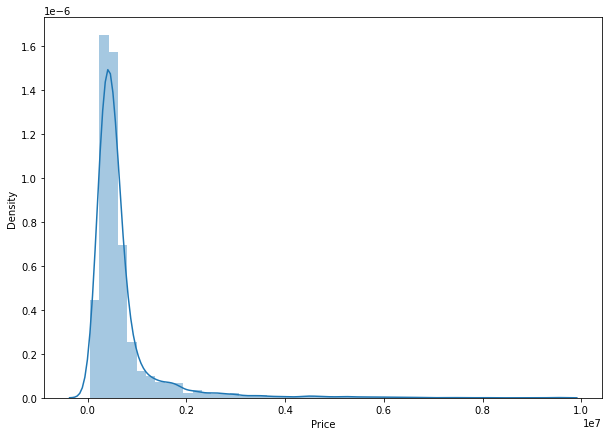

In [140]:
plt.figure(figsize= (10,7))
sns.distplot(df['Price'])

Here we can see positive skewness in the price column.

In [141]:
# Lets see the descritive statistics for the Price column
df['Price'].describe()

count    5.197000e+03
mean     6.759487e+05
std      7.577671e+05
min      4.500000e+04
25%      3.400000e+05
50%      4.800000e+05
75%      6.750000e+05
max      9.500000e+06
Name: Price, dtype: float64

Average price for old car is 675948.7  and minimum price for old car avilable in  car dekho.com is 45000.  
75 percentile of the cars are below 6.750000e+05 this range which is quite good number. 

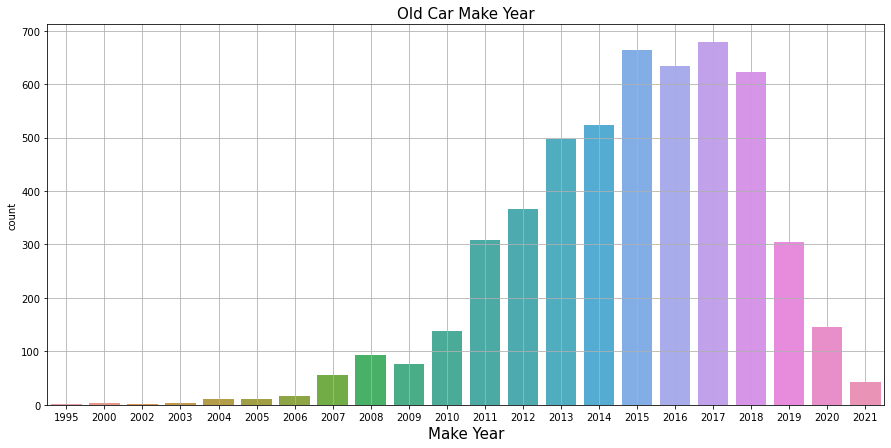

In [142]:
plt.figure(figsize= (15,7))
sns.countplot(df['Make_Year'])
plt.xlabel('Make Year', fontsize=15)
plt.title('Old Car Make Year', fontsize= 15)
plt.grid(True)
plt.show()

The oldest car we have for sale is one one car which was have make year 1995.  
Pepole also selling their New cars which is having make year 2021.  
Maximum cars we have from 2015 - 2018 Make year. 

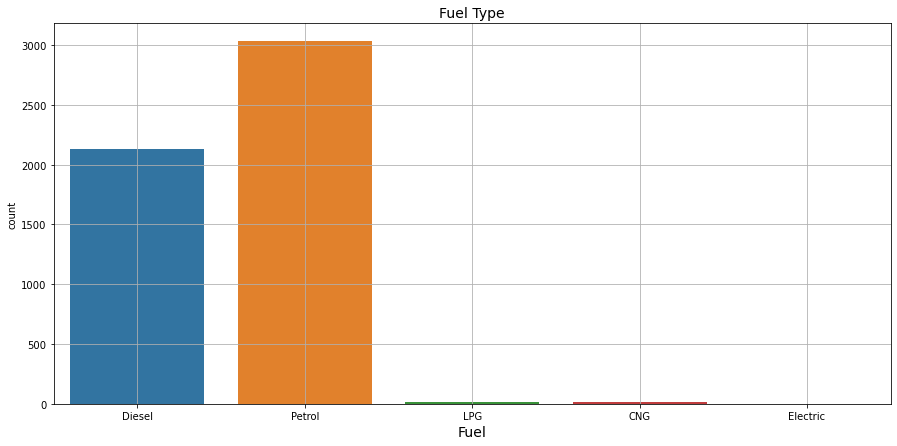

In [143]:
plt.figure(figsize= (15,7))
sns.countplot(df['Fuel'])
plt.xlabel('Fuel', fontsize=14)
plt.title('Fuel Type', fontsize= 14)
plt.grid(True)
plt.show()

Petrol cars are maximum in numbers for sale on car dekho.com  
Diesel cars are the second most listed cars on carekho.com.  
LPG, CNG and Electrice cars having very less number.  The resone might be, because customers dont want to sell their LPG,
CNG based cars. 

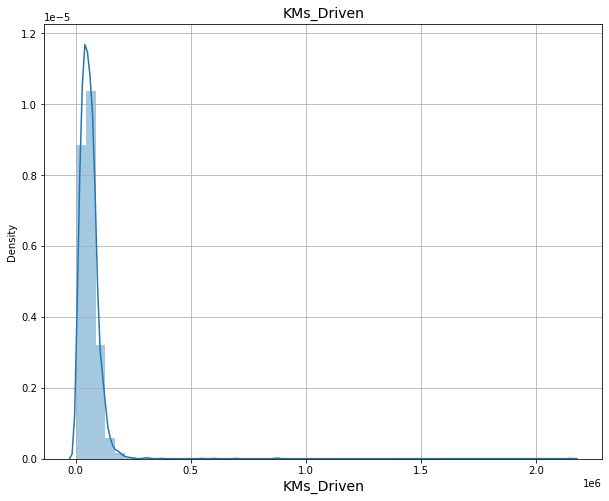

In [144]:
plt.figure(figsize=(10,8))
sns.distplot(df['KMs_Driven'])
plt.xlabel('KMs_Driven', fontsize=14)
plt.title('KMs_Driven', fontsize= 14)
plt.grid(True)
plt.show()

We can see KMs_Driven having highly positive skewness.  

In [145]:
df['KMs_Driven'].describe()

count    5.197000e+03
mean     5.907608e+04
std      5.005838e+04
min      2.010000e+02
25%      3.249200e+04
50%      5.400000e+04
75%      7.703800e+04
max      2.150000e+06
Name: KMs_Driven, dtype: float64

We can see maximum values as 2150000.00 Kms due to this values we can see skewness in the data.  
75 Percentage of the cars are 77038.00 Kms driven. 
The car which is having very less kms values 201.0 Kms, Is the newest car on for sale. 

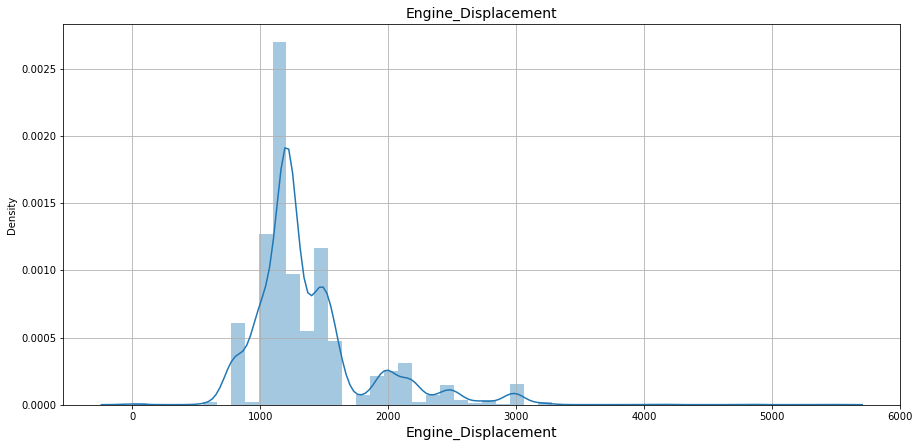

In [146]:
plt.figure(figsize= (15,7))
sns.distplot(df['Engine_Displacement'])
plt.xlabel('Engine_Displacement', fontsize=14)
plt.title('Engine_Displacement', fontsize= 14)
plt.grid(True)
plt.show()

Engine_Displacement is having positive skewness.   
Most of the cars having displacemnet in the range 1000-2000 CC.

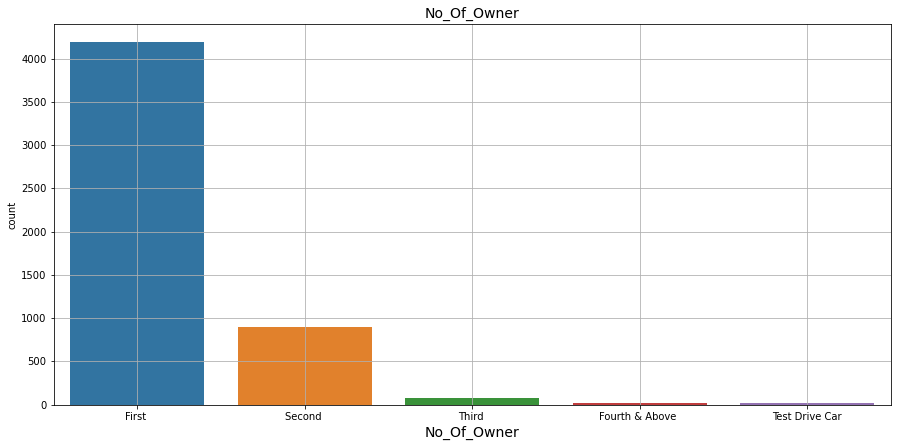

In [147]:
plt.figure(figsize= (15,7))
sns.countplot(df['No_Of_Owner'])
plt.xlabel('No_Of_Owner', fontsize=14)
plt.title('No_Of_Owner', fontsize= 14)
plt.grid(True)
plt.show()

More than 4000 car listed on the Cardekho.com are first Owner type.
Very less car are of second and third type.  
Here we can see very less numbers for Forth& Above  and test Drive cars, we can drop these values during feature selection.

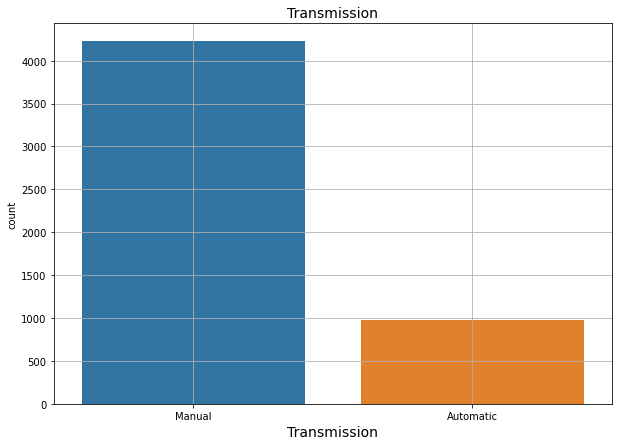

In [148]:
plt.figure(figsize= (10,7))
sns.countplot(df['Transmission'])
plt.xlabel('Transmission', fontsize=14)
plt.title('Transmission', fontsize= 14)
plt.grid(True)
plt.show()

Maximum cars having Manual Transmission type, We can say pepole are selling thier are Manual cars.  

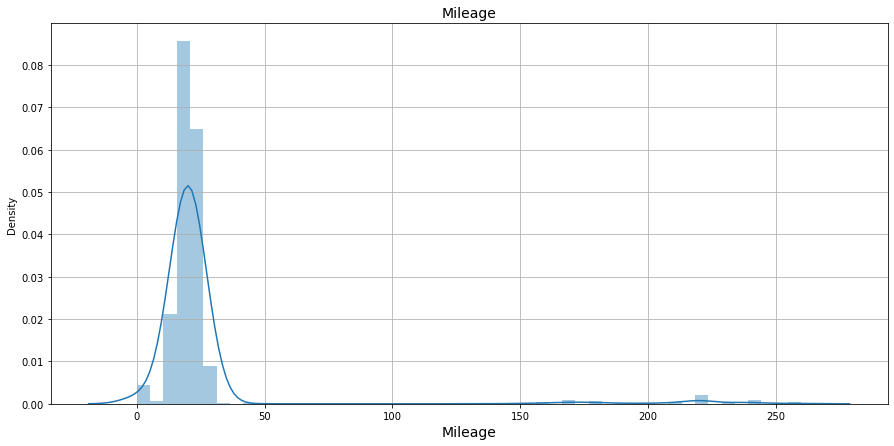

In [149]:
plt.figure(figsize= (15,7))
sns.distplot(df['Mileage'])
plt.xlabel('Mileage', fontsize=14)
plt.title('Mileage', fontsize= 14)
plt.grid(True)
plt.show()

We can see few cars having milage more than 50 which not possible in old cars, these data are outlires.
We will Remove such data. 

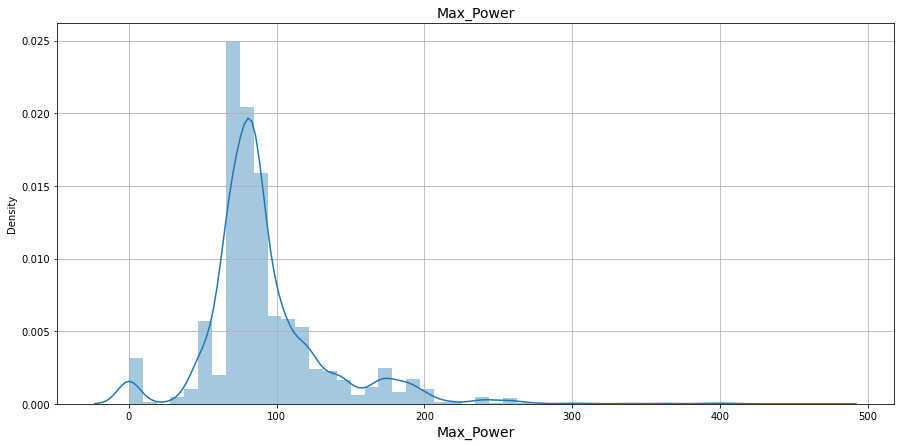

In [150]:
plt.figure(figsize= (15,7))
sns.distplot(df['Max_Power'])
plt.xlabel('Max_Power', fontsize=14)
plt.title('Max_Power', fontsize= 14)
plt.grid(True)
plt.show()

Data is slightly positive skewed.   
Power almost zero or near to zero  not possible. 

In [151]:
df['Torque']=df['Torque'].astype('float32')

In [152]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [153]:
df['Torque']=df['Torque'].round(2)

In [154]:
df['Torque']

0      190.0
1      160.0
2      200.0
3      220.0
4       22.4
5      190.0
6      113.0
7       90.0
8      109.0
9      259.9
10     400.0
11     190.0
12      90.0
13     113.7
14     146.0
15     130.0
16       5.0
17      90.0
18       5.0
19      90.0
20     200.0
21     200.0
22     190.0
23     500.0
24     205.0
25     360.0
26     550.0
27     175.0
28     190.0
29     259.9
30     219.7
31      62.0
32     200.0
33     380.0
34      90.0
35      90.0
36     400.0
37      99.1
38      90.0
39     200.0
40     350.0
41     250.0
42     170.0
43     113.8
44      99.0
45       5.0
46     109.0
47     160.0
48     110.0
49      91.0
50     280.0
51     117.0
52     113.8
53      20.4
54      90.0
55     200.0
56     327.0
57     320.0
58     114.0
59     172.5
60      90.0
61     200.0
62     259.9
63      20.4
64      74.5
65     250.0
66      20.4
67     340.0
68     259.8
69     360.0
70     110.0
71      95.0
72     259.9
73     470.0
74     220.0
75     330.0
76     145.0

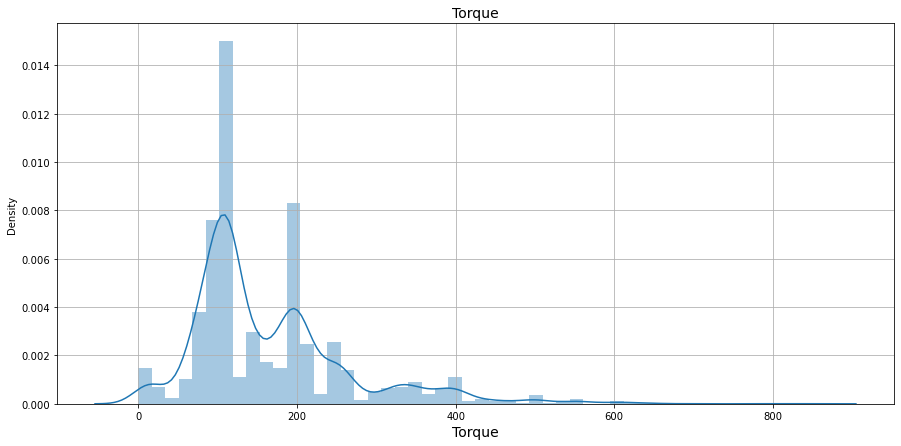

In [155]:
plt.figure(figsize= (15,7))
sns.distplot(df['Torque'])
plt.xlabel('Torque', fontsize=14)
plt.title('Torque', fontsize= 14)
plt.grid(True)
plt.show()

Torque having skewness maximum density lie between 100-200

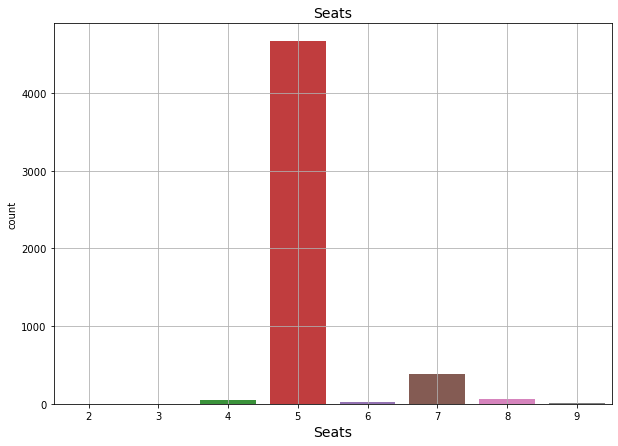

In [156]:
plt.figure(figsize= (10,7))
sns.countplot(df['Seats'])
plt.xlabel('Seats', fontsize=14)
plt.title('Seats', fontsize= 14)
plt.grid(True)
plt.show()

Maximum Cars listed on Cardekho.Com are Five seater. 

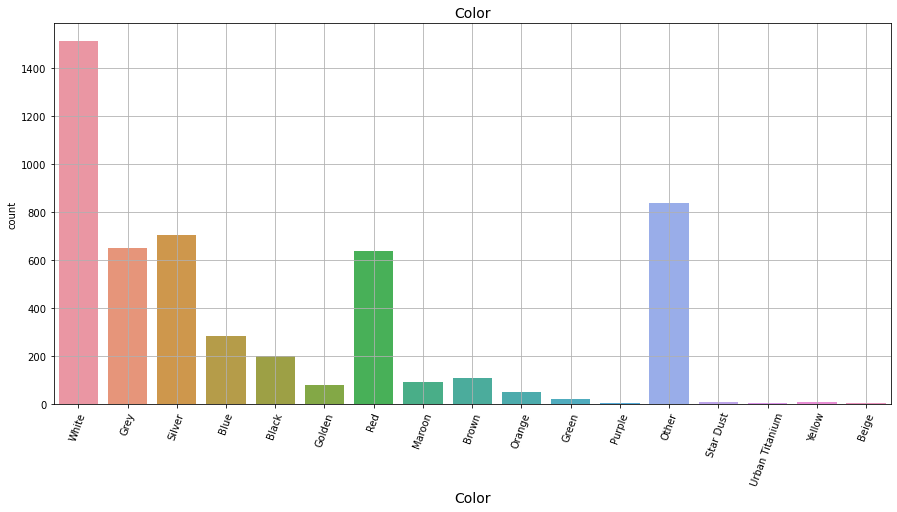

In [157]:
plt.figure(figsize= (15,7))
sns.countplot(df['Color'])
plt.xlabel('Color', fontsize=14)
plt.title('Color', fontsize= 14)
plt.xticks(rotation=70)
plt.grid(True)
plt.show()

In [158]:
df['Color'].value_counts()

White             1511
Other              839
Silver             703
Grey               648
Red                639
Blue               284
Black              198
Brown              109
Maroon              89
Golden              77
Orange              51
Green               21
Star Dust            8
Yellow               6
Urban Titanium       5
Purple               5
Beige                4
Name: Color, dtype: int64

Here We can see White color is having maximum count.  
We can see colors with very less count like Green  Star Dust, Yellow, Purple, Urban Titanium, Beige can be removed.  
To deal with such color we can replace these colors with Higher frequency. 

In [159]:
df['Color'].replace(to_replace=['Green','Star Dust', 'Yellow', 'Purple','Urban Titanium','Beige'],
                   value= 'White', inplace= True)

In [160]:
df['Color'].value_counts()

White     1560
Other      839
Silver     703
Grey       648
Red        639
Blue       284
Black      198
Brown      109
Maroon      89
Golden      77
Orange      51
Name: Color, dtype: int64

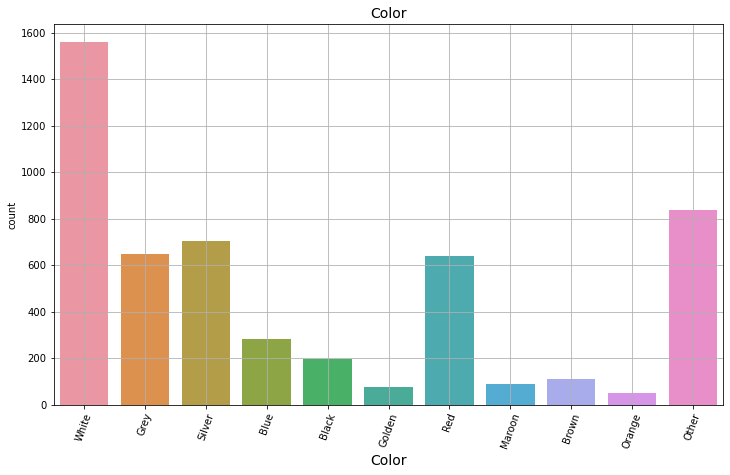

In [161]:
plt.figure(figsize= (12,7))
sns.countplot(df['Color'])
plt.xlabel('Color', fontsize=14)
plt.title('Color', fontsize= 14)
plt.xticks(rotation=70)
plt.grid(True)
plt.show()

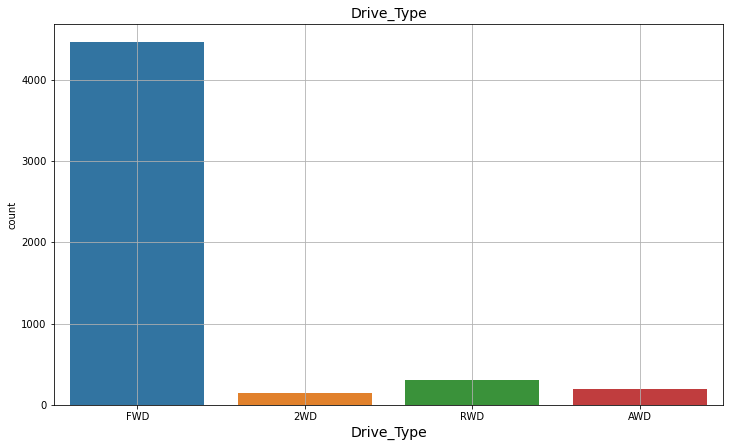

In [162]:
plt.figure(figsize= (12,7))
sns.countplot(df['Drive_Type'])
plt.xlabel('Drive_Type', fontsize=14)
plt.title('Drive_Type', fontsize= 14)
plt.grid(True)
plt.show()

We can see most of the cars are Front wheel Drive Type. 

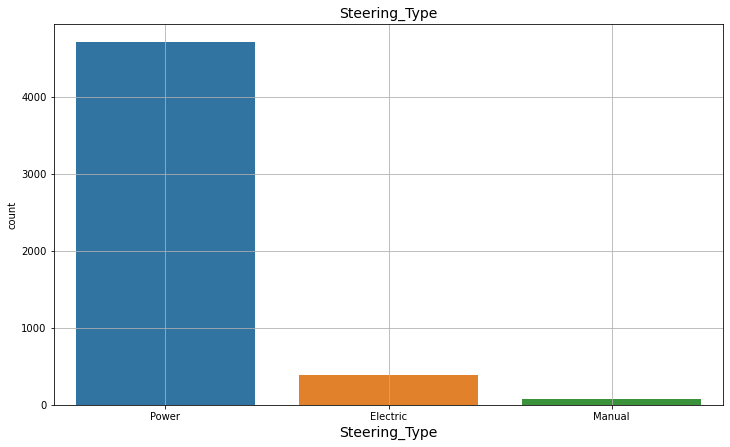

In [163]:
plt.figure(figsize= (12,7))
sns.countplot(df['Steering_Type'])
plt.xlabel('Steering_Type', fontsize=14)
plt.title('Steering_Type', fontsize= 14)
plt.grid(True)
plt.show()

Majority of the cars are having Power Steering.  

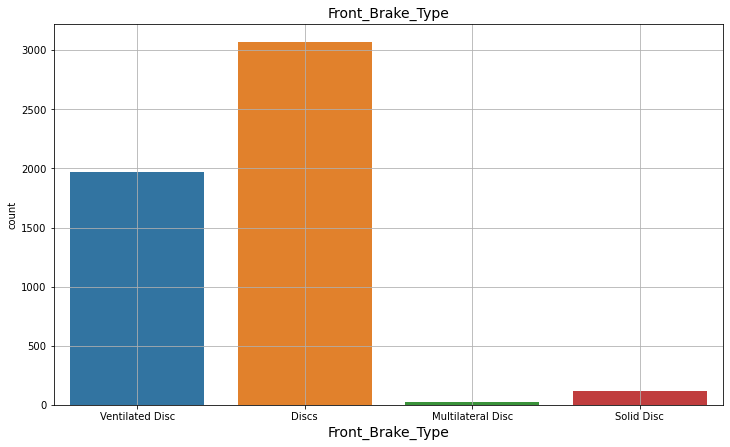

In [164]:
plt.figure(figsize= (12,7))
sns.countplot(df['Front_Brake_Type'])
plt.xlabel('Front_Brake_Type', fontsize=14)
plt.title('Front_Brake_Type', fontsize= 14)
plt.grid(True)
plt.show()

Majority of the Front Brakes are having Discs type.   
Multilateral Disc and Solid disc are very less in number.

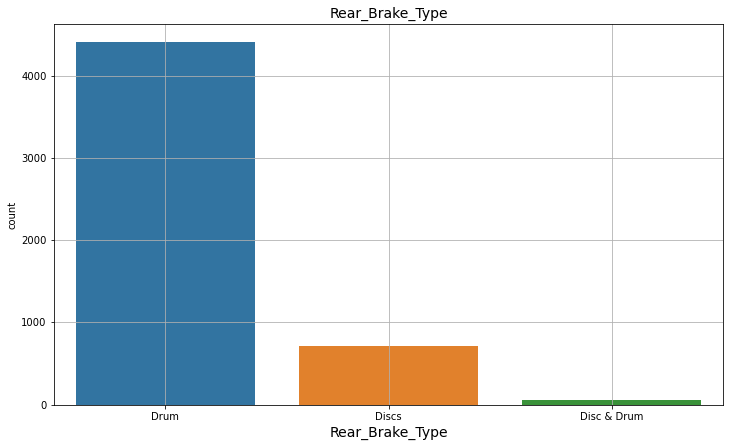

In [165]:
plt.figure(figsize= (12,7))
sns.countplot(df['Rear_Brake_Type'])
plt.xlabel('Rear_Brake_Type', fontsize=14)
plt.title('Rear_Brake_Type', fontsize= 14)
plt.grid(True)
plt.show()

Majority of the Rear Wheel having Drum Breaks.  
Very less number of cars are having Discs Break 

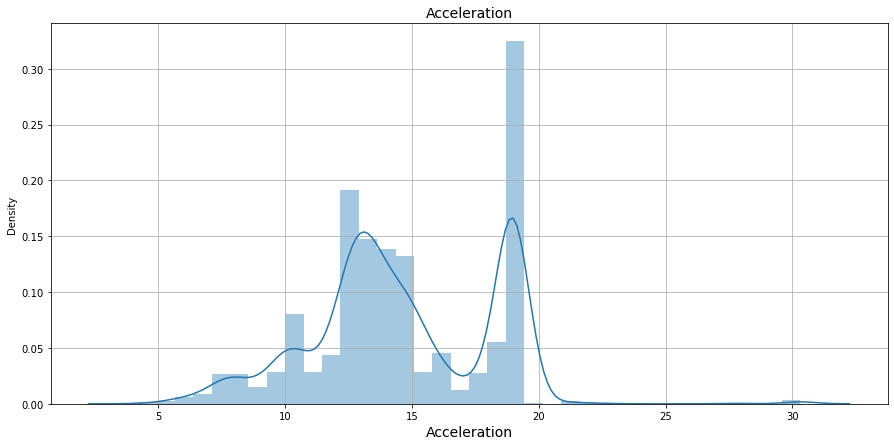

In [166]:
plt.figure(figsize= (15,7))
sns.distplot(df['Acceleration'])
plt.xlabel('Acceleration', fontsize=14)
plt.title('Acceleration', fontsize= 14)
plt.grid(True)
plt.show()

data Is having skewness, There are less cars having accelertion less than 10.

Lets First change the Float 64 to 32 and int64 to int32. 

In [167]:
df['Max_Power']=df['Max_Power'].astype('float32')

In [168]:
df['Acceleration']=df['Acceleration'].astype('float32')

In [169]:
df['Seats']=df['Seats'].astype('int32')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5197 non-null   object 
 1   Make_Year            5197 non-null   int32  
 2   Fuel                 5197 non-null   object 
 3   KMs_Driven           5197 non-null   int32  
 4   Engine_Displacement  5197 non-null   int32  
 5   No_Of_Owner          5197 non-null   object 
 6   Transmission         5197 non-null   object 
 7   Mileage              5197 non-null   float32
 8   Max_Power            5197 non-null   float32
 9   Torque               5197 non-null   float32
 10  Seats                5197 non-null   int32  
 11  Color                5197 non-null   object 
 12  Gear_Box             5197 non-null   int32  
 13  Drive_Type           5104 non-null   object 
 14  Steering_Type        5172 non-null   object 
 15  Front_Brake_Type     5173 non-null   o

Lets Deal with Null Values Present in our dataset

We have 537 null values which is maximum in acceeration, column, 24 values in Rear_Brake_Type, and  Front_Brake_Type  
25 in Steering_Type, and 93 in Drive_Type. 

In [171]:
df['Drive_Type'].value_counts()

FWD    4466
RWD     302
AWD     187
2WD     149
Name: Drive_Type, dtype: int64

Here we can see FWD is higest occuring value, we will replace all the null in Drive type with FWD.

In [172]:
df['Drive_Type'].fillna('FWD', inplace=True)

In [173]:
df['Steering_Type'].value_counts()

Power       4712
Electric     381
Manual        79
Name: Steering_Type, dtype: int64

Here we can see Power type is higest occuring value, we will replace all the null with Power.

In [174]:
df['Steering_Type'].fillna('Power', inplace=True)

In [175]:
df['Front_Brake_Type'].value_counts()

Discs                3069
Ventilated Disc      1970
Solid Disc            115
Multilateral Disc      19
Name: Front_Brake_Type, dtype: int64

Here we can see Power type is Discs occuring value, we will replace all the null with Discs.

In [176]:
df['Front_Brake_Type'].fillna('Discs', inplace=True)

In [177]:
df['Rear_Brake_Type'].value_counts()

Drum           4404
Discs           709
Disc & Drum      60
Name: Rear_Brake_Type, dtype: int64

Here we can see Power type is Drum occuring value, we will replace all the null with Drum.

In [178]:
df['Rear_Brake_Type'].fillna('Drum', inplace=True)

In [179]:
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
dtype: int64

In [180]:
df['Acceleration'].describe()

count   4660.0
mean      14.6
std        3.5
min        4.2
25%       12.5
50%       14.0
75%       18.6
max       30.3
Name: Acceleration, dtype: float64

in Acceleration column we will fill nan with mean of that column.

In [181]:
df['Acceleration'].fillna(value =14.6, inplace=True)

In [182]:
df.isnull().sum()

Brand                  0
Make_Year              0
Fuel                   0
KMs_Driven             0
Engine_Displacement    0
No_Of_Owner            0
Transmission           0
Mileage                0
Max_Power              0
Torque                 0
Seats                  0
Color                  0
Gear_Box               0
Drive_Type             0
Steering_Type          0
Front_Brake_Type       0
Rear_Brake_Type        0
Acceleration           0
Price                  0
dtype: int64

We have removed all the null values Lets move to Bivariate analysis

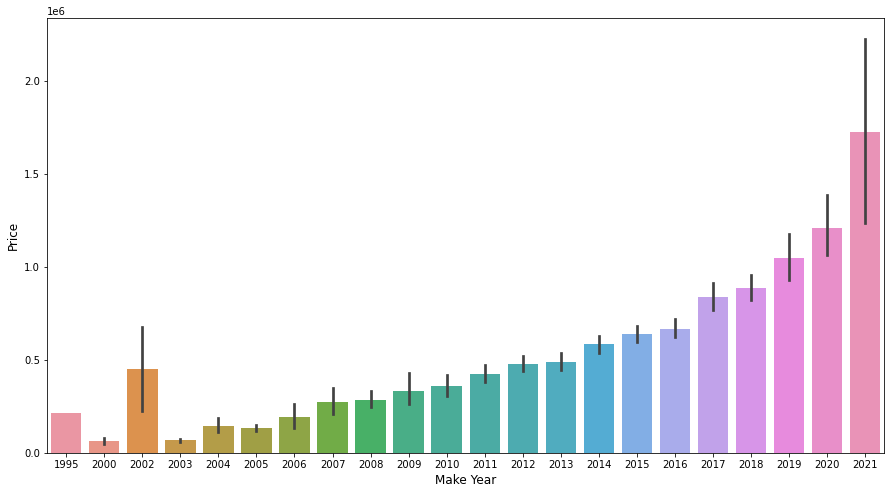

In [183]:
# Lets analyse the price and make year relation
plt.figure(figsize= (15,8))
sns.barplot(x='Make_Year', y='Price', data= df)
plt.xlabel('Make Year', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()


We can see clearly the cars having latest make year are having higher price as compare to older cars.  

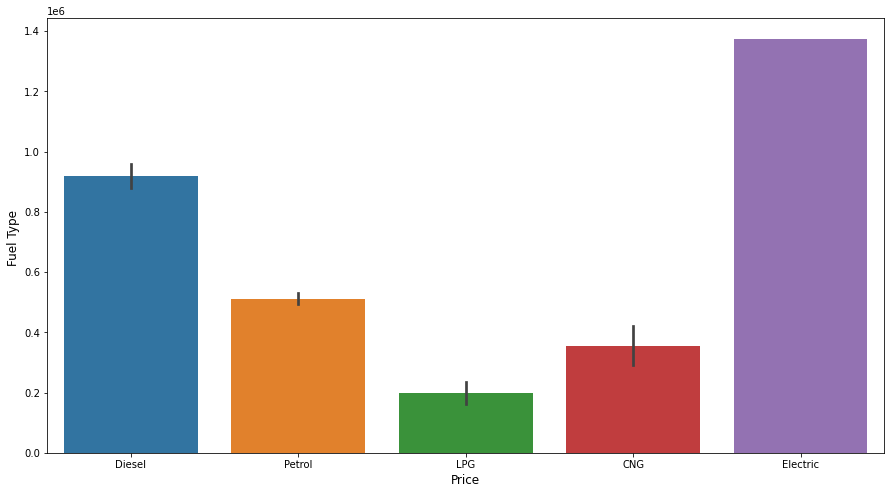

In [184]:
# Lets analyse the price and fuel relation
plt.figure(figsize= (15,8))
sns.barplot(x='Fuel', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Fuel Type ', fontsize= 12)
plt.show()

From the graph we can see, electric cars are having higher price than other type of fuel type.  
If we campare between petrol and diesel, diesel cars are having hogher price than the petrol cars.  

In [185]:
# Lets check The electric car and price  available in our data
df[df['Fuel']=='Electric']

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Price
2039,Toyota Camry Hybrid,2014,Electric,70000,2494,First,Automatic,19.2,157.7,213.0,5,Grey,6,FWD,Power,Ventilated Disc,Discs,10.8,1375000


We can see we have only one car which is electric type and having very high price, lets drop this column

In [186]:
df.drop(2039, inplace= True)

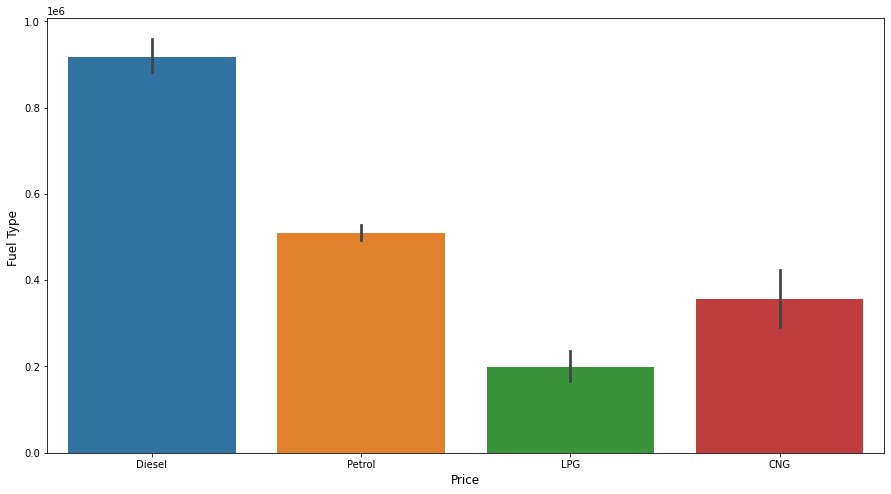

In [187]:
# Lets analyse Fule agin after droping the Electric car
plt.figure(figsize= (15,8))
sns.barplot(x='Fuel', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Fuel Type ', fontsize= 12)
plt.show()

Here we can see Diesel Cars are Higher in Price.

Lets analyse KMs_Driven relation with price.

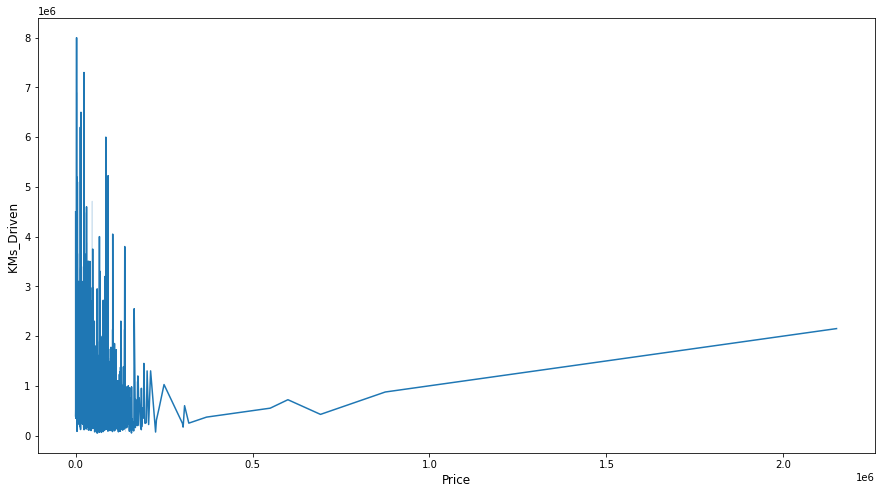

In [188]:
# Lets analyse the price and Kms_driven relation
plt.figure(figsize= (15,8))
sns.lineplot( y='Price', x='KMs_Driven', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('KMs_Driven ', fontsize= 12)
plt.show()

Here We can say Higher the value of KM driven lower the price of the car.  
Inialy when the KMs Driven are high, price lies in range 0.0- 0.5 

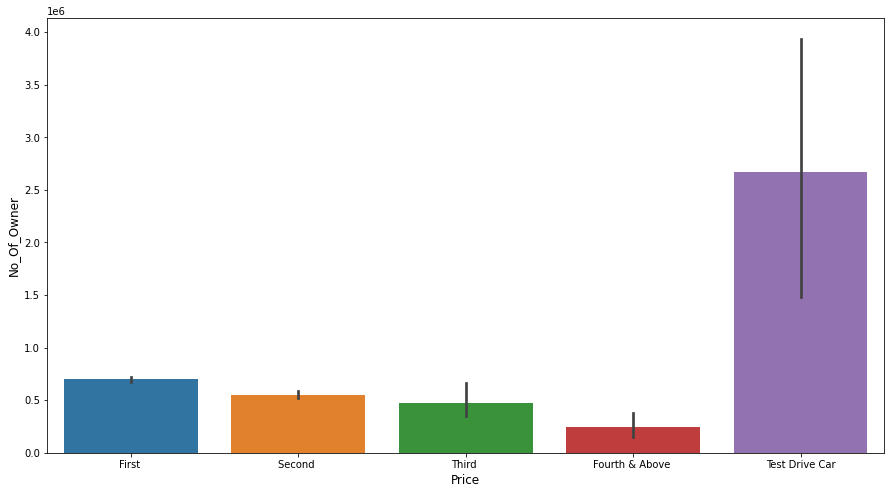

In [189]:
# Lets analyse the price and No of Owner
plt.figure(figsize= (15,8))
sns.barplot(x='No_Of_Owner', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('No_Of_Owner', fontsize= 12)
plt.show()

From the above Graph we can say test drive cars are having higher price as compare to other cars.  
After that First owner caers having higher price as compare to second, third and above owners.

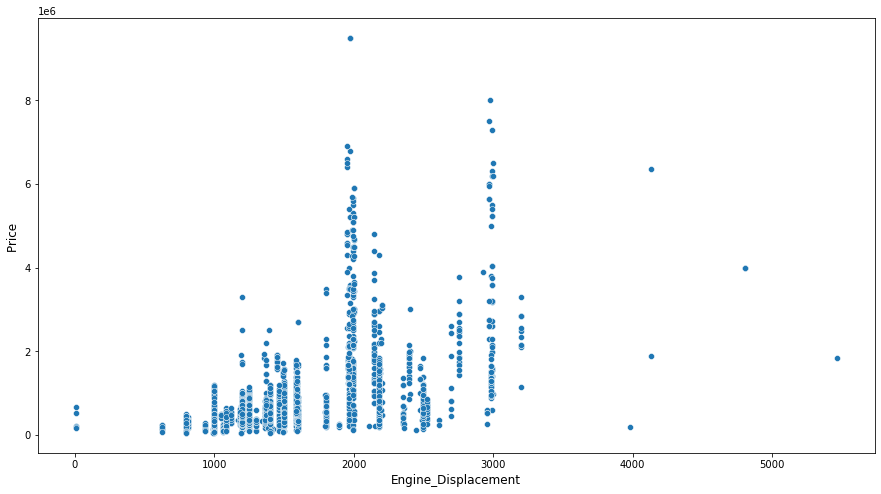

In [190]:
# Lets analyse the price and Engine_Displacement  relation
plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Engine_Displacement', data= df)
plt.xlabel('Engine_Displacement', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

We can see cars prices are higher for cars having Engine_Displacement greater than 2000 and qual to 2000 

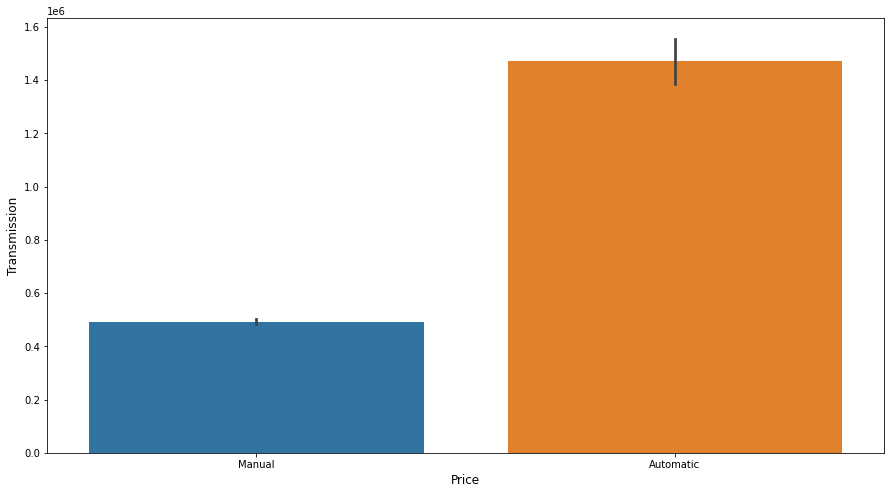

In [191]:
# Lets analyse the price and No of Owner
plt.figure(figsize= (15,8))
sns.barplot(x='Transmission', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Transmission', fontsize= 12)
plt.show()

Automaic transmisssion cars having higher price as compare to Manual. 

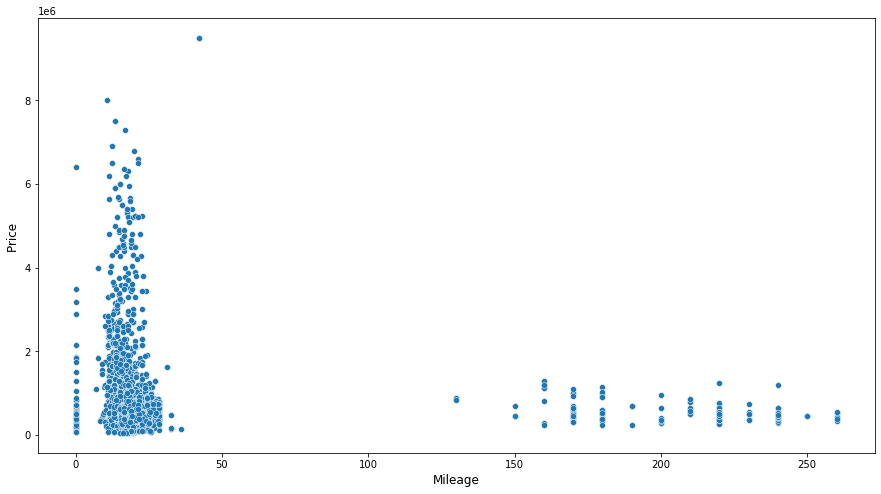

In [192]:
# Lets analyse the price and Mileage  relation
plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Mileage', data= df)
plt.xlabel('Mileage', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

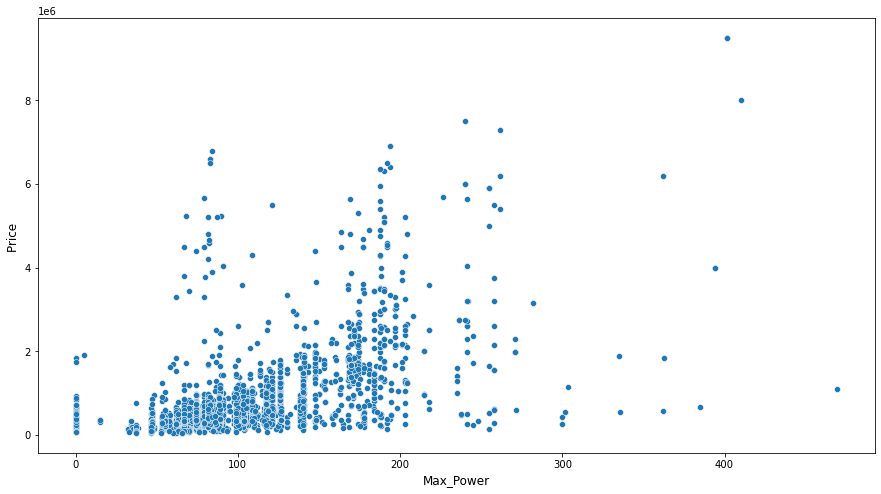

In [193]:
# Lets analyse the price and Max_Power  relation
plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Max_Power', data= df)
plt.xlabel('Max_Power', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

Cars with maximum power are higher in price than other cars.

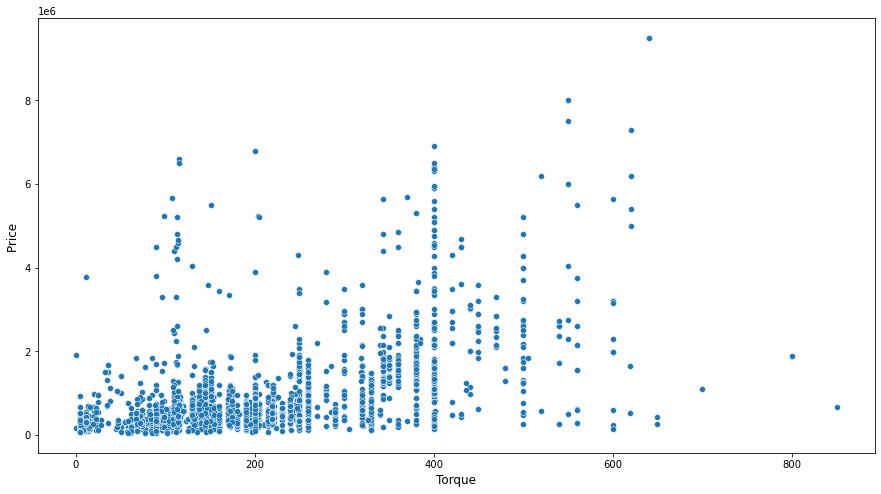

In [194]:
# Lets analyse the price and Torque  relation
plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Torque', data= df)
plt.xlabel('Torque', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

With increase in value of torue price also increasing 

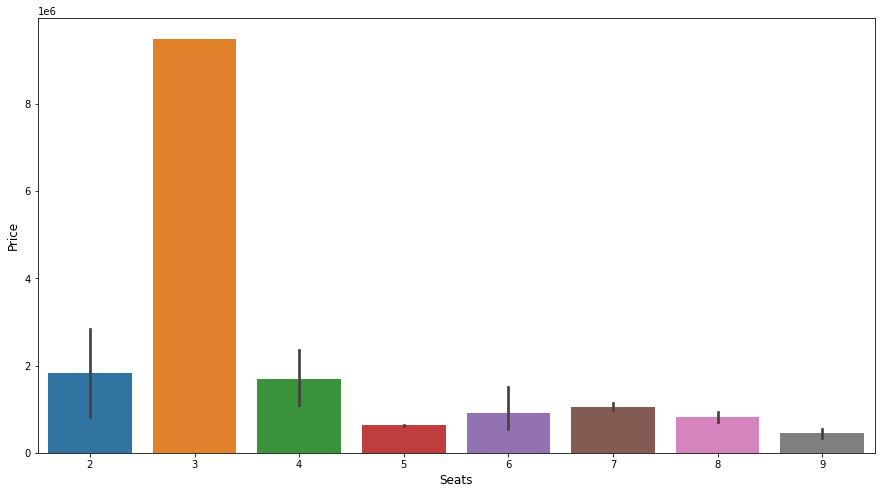

In [195]:
# Lets analyse the price and Seats
plt.figure(figsize= (15,8))
sns.barplot(x='Seats', y='Price', data= df)
plt.xlabel('Seats', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()

Cars having 3 seats are having higher price.   
Cars with 5 seats is having less prices as compare to other.

In [196]:
df[df['Seats']==3]

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Price
455,Volvo XC 90 Excellence,2017,Petrol,47000,1969,First,Automatic,42.0,401.4,640.0,3,Silver,8,AWD,Power,Discs,Discs,5.6,9500000
580,Volvo XC 90 Excellence,2017,Petrol,47000,1969,First,Automatic,42.0,401.4,640.0,3,Silver,8,AWD,Power,Discs,Discs,5.6,9500000


Here we car see Car which is having higher price with 3 seatig capacity , which is not possible. 
we will drop this two rows from dataframe.

In [197]:
df= df.drop([455, 580], axis=0)

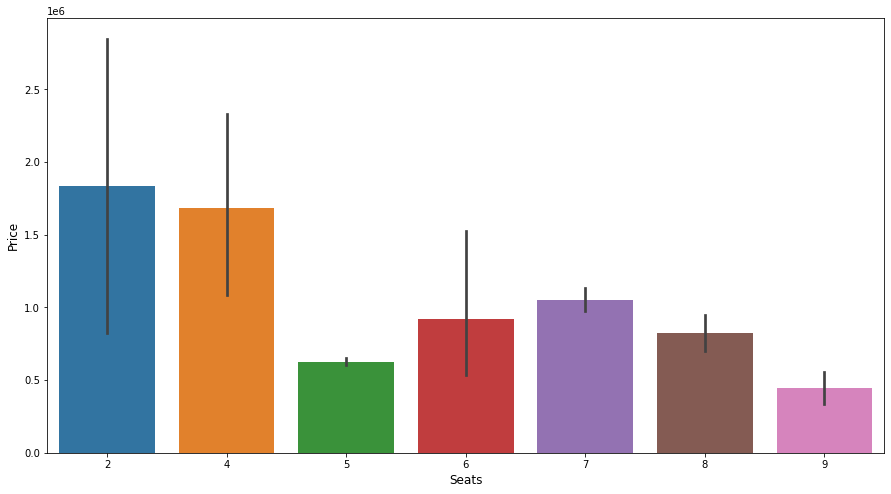

In [198]:
# Lets analyse the price and Seats
plt.figure(figsize= (15,8))
sns.barplot(x='Seats', y='Price', data= df)
plt.xlabel('Seats', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()

After droping the car with seats 3, we can see 2 seater cars having higher Price and 5 seater cars are economical 

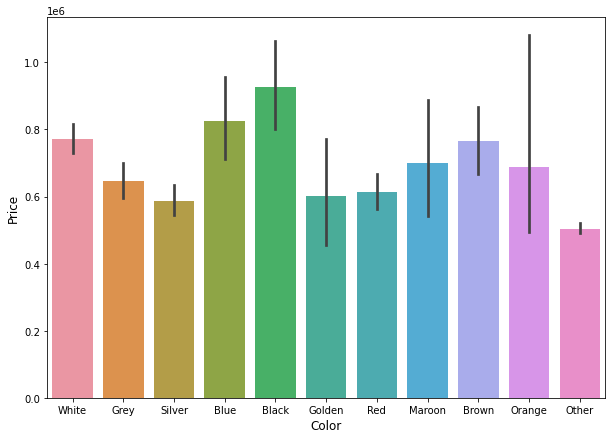

In [199]:
# Lets analyse the color factor on the price
plt.figure(figsize= (10,7))
sns.barplot(x='Color', y='Price', data= df)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

Here we can see there is no direct relation of color with Price.  
In our  data Black cars having higher Price as compare to other. 

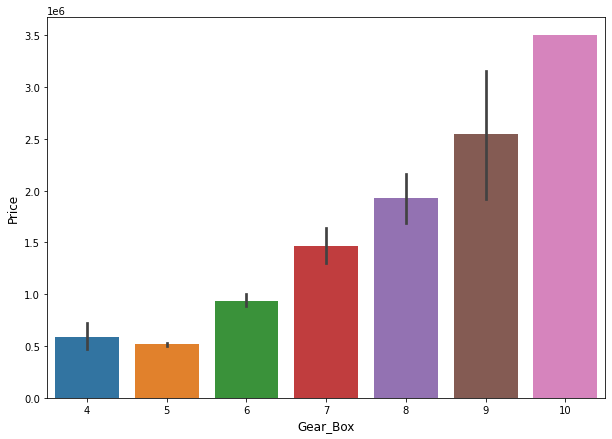

In [200]:
#Lets analyse the price on the basis of the Gear_box

plt.figure(figsize= (10,7))
sns.barplot(x='Gear_Box', y='Price', data= df)
plt.xlabel('Gear_Box', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

We can clearly see with increase in the number of gears the price of  cars are increasing.

In [201]:
# Lets see Rows having cars with 10 Gears 
df[df['Gear_Box']==10]

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Price
3187,Ford Endeavour Titanium Plus,2020,Diesel,4500,1996,First,Automatic,13.9,167.6,420.0,7,White,10,RWD,Power,Discs,Discs,19.0,3500000


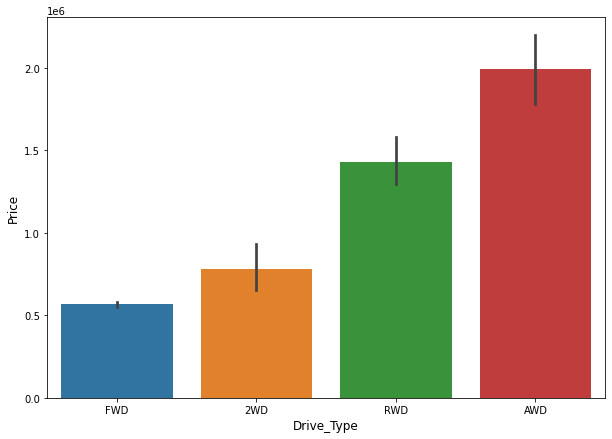

In [202]:
# Analysing Drive_Type with respect to price of the cars
plt.figure(figsize= (10,7))
sns.barplot(x='Drive_Type', y='Price', data= df)
plt.xlabel('Drive_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

We can see All wheel drive cars are having higher price as compare to the front wheel and rear wheel drive cars.

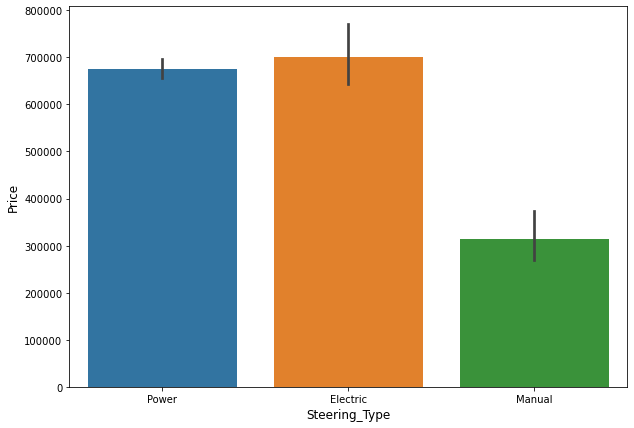

In [203]:
# Analysing Steering_Type with respect to price of the cars
plt.figure(figsize= (10,7))
sns.barplot(x='Steering_Type', y='Price', data= df)
plt.xlabel('Steering_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

Power and electric stering type both having almost equal price.  
Manual Stering system are rare and having very low price.

Text(0, 0.5, 'Price')

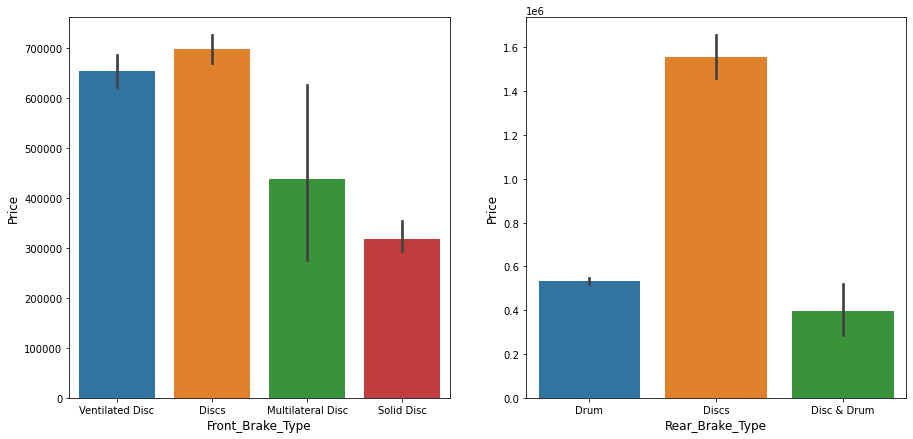

In [204]:
# Analysing Front_Brake_Type with respect to price of the cars
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.barplot(x='Front_Brake_Type', y='Price', data= df)
plt.xlabel('Front_Brake_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)

plt.subplot(1,2,2)
sns.barplot(x='Rear_Brake_Type', y='Price', data= df)
plt.xlabel('Rear_Brake_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)

We can see Cars having Discs type breaks are higher than the other types of breaks

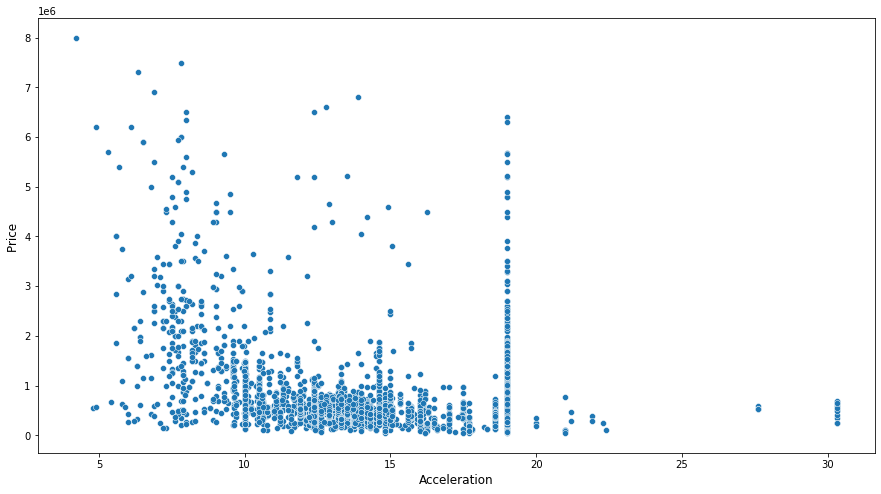

In [205]:
plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Acceleration', data= df)
plt.xlabel('Acceleration', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

Car Having Low value of acceleration are having more price.  
With increase in the acceleration price decrease. 

### Feature Engineering

In this step of the project we will extract all the required feture for our model devlopment and convert the categorical features
into numerical feature 

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5194 entries, 0 to 5196
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5194 non-null   object 
 1   Make_Year            5194 non-null   int32  
 2   Fuel                 5194 non-null   object 
 3   KMs_Driven           5194 non-null   int32  
 4   Engine_Displacement  5194 non-null   int32  
 5   No_Of_Owner          5194 non-null   object 
 6   Transmission         5194 non-null   object 
 7   Mileage              5194 non-null   float32
 8   Max_Power            5194 non-null   float32
 9   Torque               5194 non-null   float32
 10  Seats                5194 non-null   int32  
 11  Color                5194 non-null   object 
 12  Gear_Box             5194 non-null   int32  
 13  Drive_Type           5194 non-null   object 
 14  Steering_Type        5194 non-null   object 
 15  Front_Brake_Type     5194 non-null   o

We have 9 object type, 6 integer and 4 numerical type column , Lets first extract the numerical and categorical and descrite
Features from the data

Brand Name is just the name cars we will drop this column first

In [207]:
#Droping Brand Name
df.drop('Brand', inplace=True, axis=1)

In [208]:
categorial_features = df.select_dtypes(include=[np.object])
categorial_features.head()

,Fuel,No_Of_Owner,Transmission,Color,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type
0,Diesel,First,Manual,White,FWD,Power,Ventilated Disc,Drum
1,Diesel,Second,Manual,Grey,FWD,Power,Ventilated Disc,Drum
2,Diesel,First,Manual,Silver,FWD,Power,Discs,Discs
3,Diesel,First,Manual,White,FWD,Power,Discs,Drum
4,Diesel,First,Manual,White,FWD,Power,Discs,Drum


In [209]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())
    print('*'*20)


Fuel column: 
Petrol    3028
Diesel    2132
CNG         18
LPG         16
Name: Fuel, dtype: int64
********************

No_Of_Owner column: 
First              4187
Second              893
Third                82
Test Drive Car       18
Fourth & Above       14
Name: No_Of_Owner, dtype: int64
********************

Transmission column: 
Manual       4224
Automatic     970
Name: Transmission, dtype: int64
********************

Color column: 
White     1560
Other      839
Silver     701
Grey       647
Red        639
Blue       284
Black      198
Brown      109
Maroon      89
Golden      77
Orange      51
Name: Color, dtype: int64
********************

Drive_Type column: 
FWD    4558
RWD     302
AWD     185
2WD     149
Name: Drive_Type, dtype: int64
********************

Steering_Type column: 
Power       4734
Electric     381
Manual        79
Name: Steering_Type, dtype: int64
********************

Front_Brake_Type column: 
Discs                3091
Ventilated Disc      1969
Solid Disc   

We can see CNG  and LPG Based cars are very less in numbers. we can drop these row.   
We can drop Multilateral Disc type or replace it with disc  
Disc & Drum    also can be droped

In [210]:
df = df[df.Fuel != 'CNG']

In [211]:
df = df[df.Fuel != 'LPG']

In [212]:
df = df[df.No_Of_Owner != 'Fourth & Above ']

In [213]:
df = df[df.Color != 'Orange']

In [214]:
df = df[df.Front_Brake_Type != 'Multilateral Disc']

In [215]:
df = df[df.Rear_Brake_Type != 'Disc & Drum']

In [216]:
df.columns

Index(['Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement', 'No_Of_Owner',
       'Transmission', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Color',
       'Gear_Box', 'Drive_Type', 'Steering_Type', 'Front_Brake_Type',
       'Rear_Brake_Type', 'Acceleration', 'Price'],
      dtype='object')

In [217]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())
    print('*'*20)


Fuel column: 
Petrol    2931
Diesel    2095
Name: Fuel, dtype: int64
********************

No_Of_Owner column: 
First             4074
Second             861
Third               74
Test Drive Car      17
Name: No_Of_Owner, dtype: int64
********************

Transmission column: 
Manual       4082
Automatic     944
Name: Transmission, dtype: int64
********************

Color column: 
White     1513
Other      839
Silver     684
Grey       638
Red        618
Blue       274
Black      191
Brown      109
Maroon      87
Golden      73
Name: Color, dtype: int64
********************

Drive_Type column: 
FWD    4417
RWD     283
AWD     181
2WD     145
Name: Drive_Type, dtype: int64
********************

Steering_Type column: 
Power       4576
Electric     377
Manual        73
Name: Steering_Type, dtype: int64
********************

Front_Brake_Type column: 
Discs              2984
Ventilated Disc    1928
Solid Disc          114
Name: Front_Brake_Type, dtype: int64
********************

Rear_Br

All the categorical feature are nominal, We will be using pandas get dummie to encode our categorical values. 

In [218]:
#applying get dummies of panda for one hot encoding 
data_new= pd.get_dummies(df,drop_first = True)

In [219]:
data_new.head()

,Make_Year,KMs_Driven,Engine_Displacement,Mileage,Max_Power,Torque,Seats,Gear_Box,Acceleration,Price,Fuel_Petrol,No_Of_Owner_Second,No_Of_Owner_Test Drive Car,No_Of_Owner_Third,Transmission_Manual,Color_Blue,Color_Brown,Color_Golden,Color_Grey,Color_Maroon,Color_Other,Color_Red,Color_Silver,Color_White,Drive_Type_AWD,Drive_Type_FWD,Drive_Type_RWD,Steering_Type_Manual,Steering_Type_Power,Front_Brake_Type_Solid Disc,Front_Brake_Type_Ventilated Disc,Rear_Brake_Type_Drum
0,2014,100821,1248,25.2,74.0,190.0,5,5,14.8,304000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1
1,2012,102456,1399,20.0,68.0,160.0,5,5,14.8,110000,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
2,2017,86698,1248,25.1,88.5,200.0,5,5,13.4,660000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,2015,60603,1396,21.2,88.7,220.0,5,6,15.0,490000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
4,2012,145814,1396,23.0,90.0,22.4,5,6,13.0,236000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1


In [220]:
# New shape of the data 
data_new.shape

(5026, 32)

### Lets Check the correlation

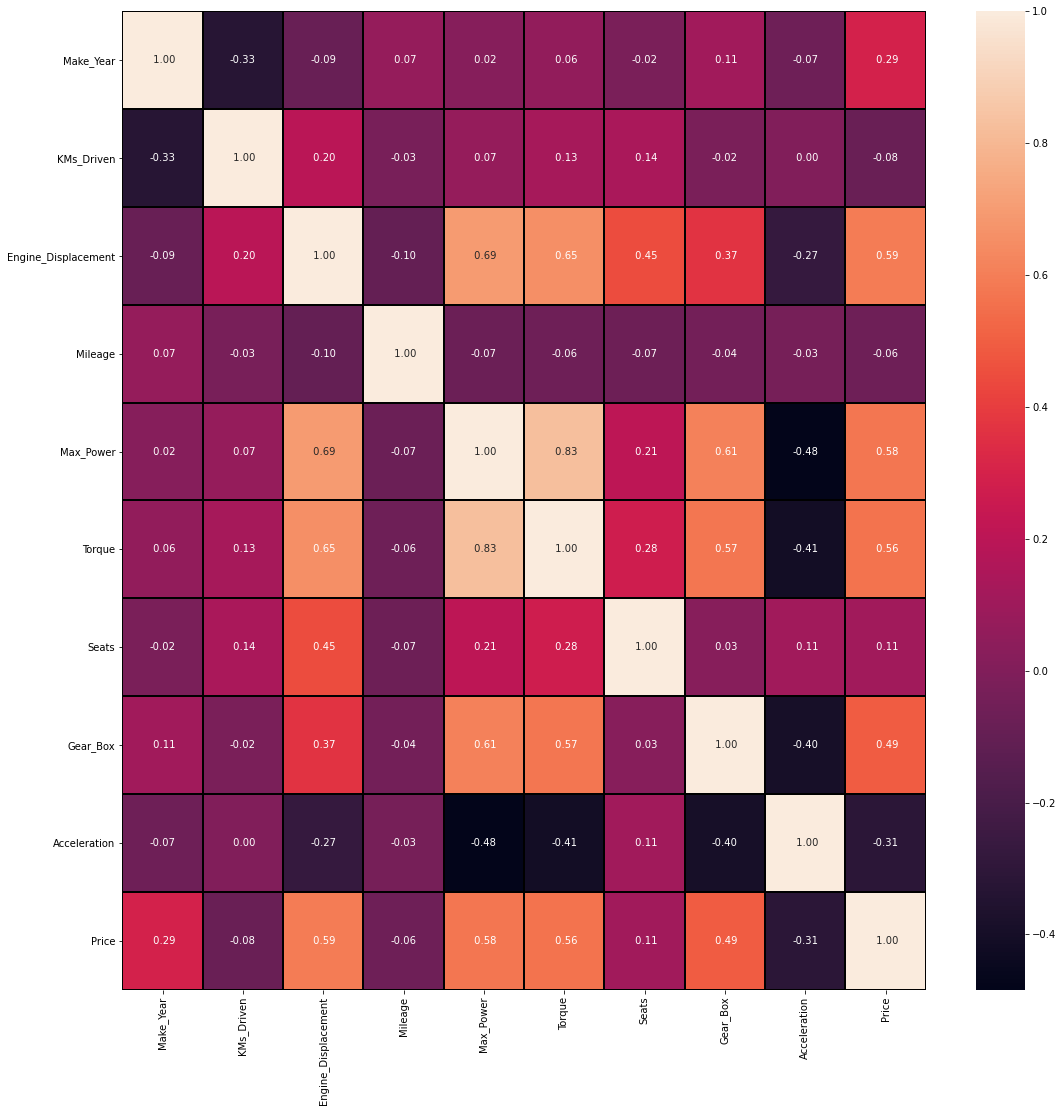

In [221]:
# Finding correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, linewidths=1,linecolor='black',fmt=' .2f' )
plt.show()

Here we can see Gear_box, Max_Power, Torque and Engine_Displacement are having high correlation.

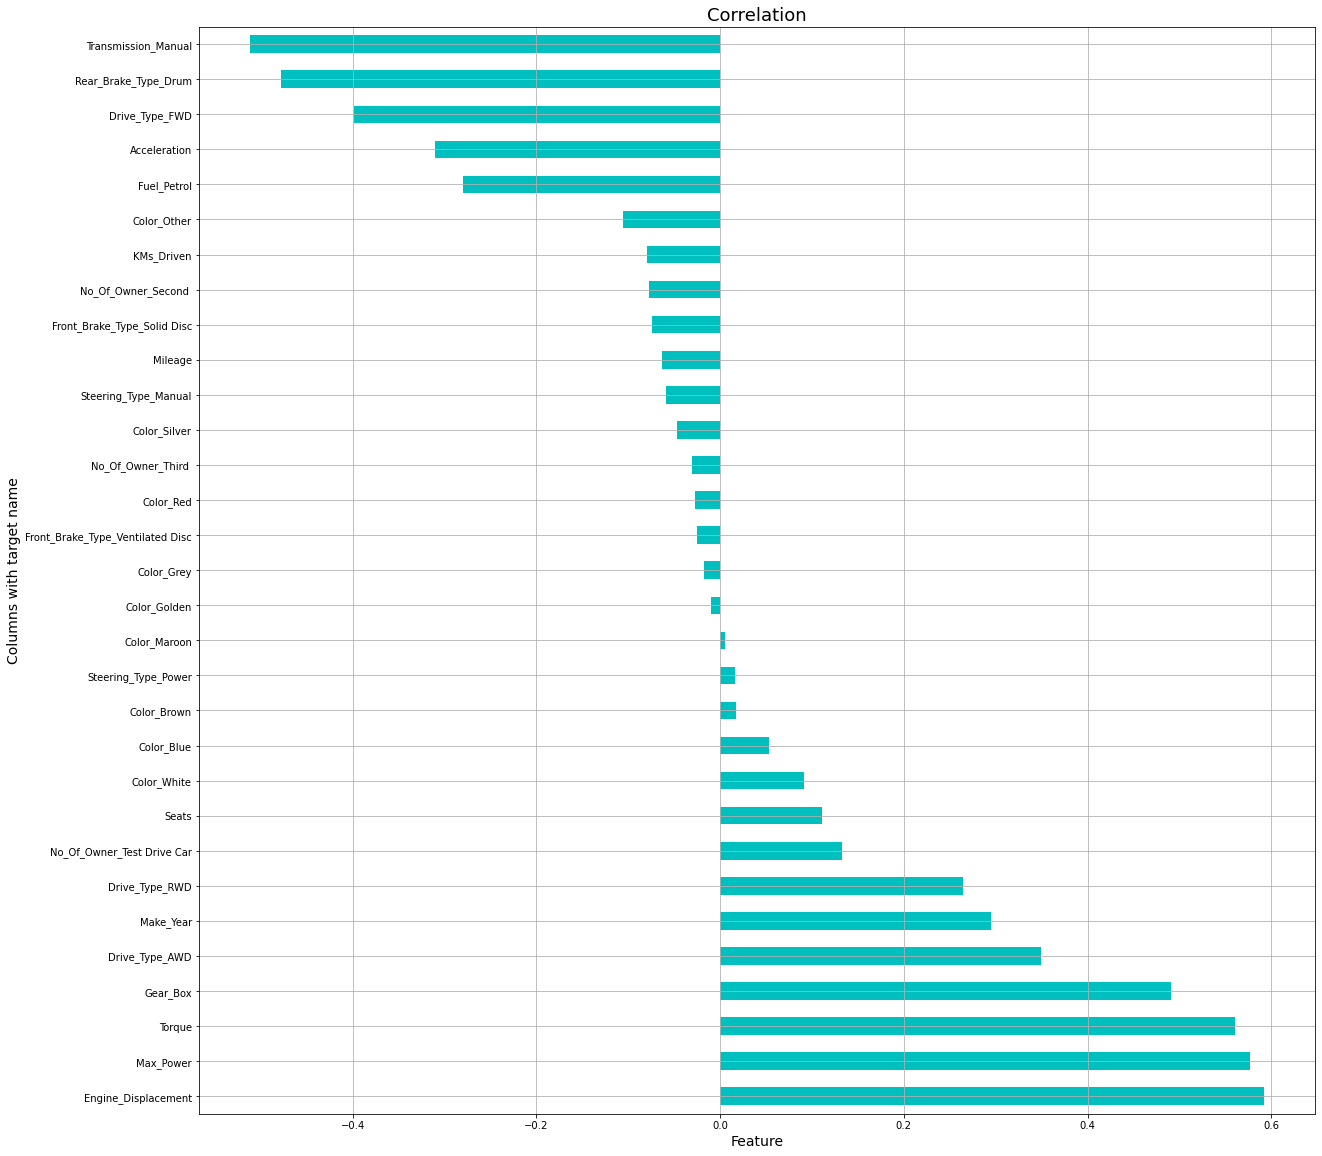

In [222]:
plt.figure(figsize=(20,20))
data_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the targat,  
and Features on the left of the 0.0 are having negative or 0 correlation.

## Checking Outliers

We will check the ouliers presnt in the numercal columns.

<AxesSubplot:>

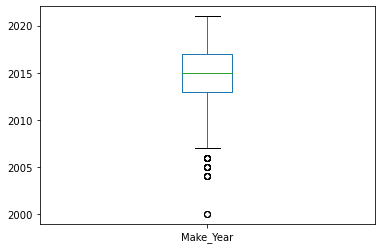

In [223]:
data_new['Make_Year'].plot.box()

In Make years we are having very less outliers, 

<AxesSubplot:>

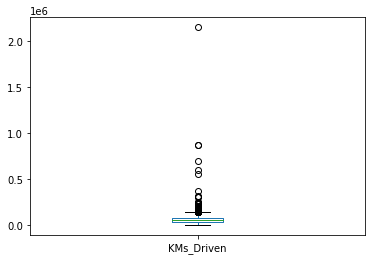

In [224]:
data_new['KMs_Driven'].plot.box()

We have many outlier in the KMs_Driven

<AxesSubplot:>

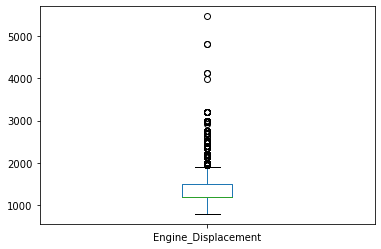

In [225]:
data_new['Engine_Displacement'].plot.box()

Engine_Displacement also having outliers 

<AxesSubplot:>

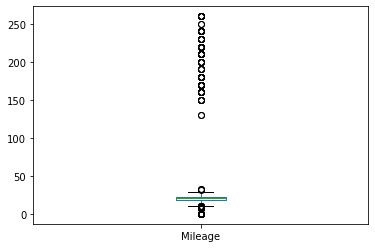

In [226]:
data_new['Mileage'].plot.box()

The values above 35 are outliers 

<AxesSubplot:>

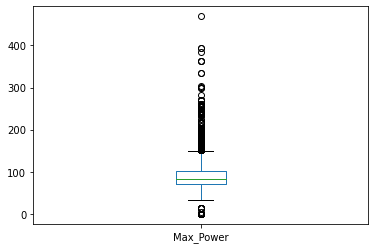

In [227]:
data_new['Max_Power'].plot.box()

Max_Power also having outliers 

<AxesSubplot:>

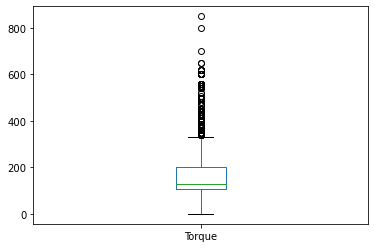

In [228]:
data_new['Torque'].plot.box()

We have outliers in Torque column also.

<AxesSubplot:>

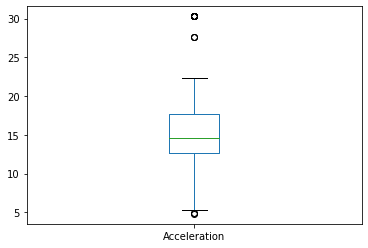

In [229]:
data_new['Acceleration'].plot.box()

## Removing Outliers

In [230]:
from scipy.stats import zscore
z=np.abs(zscore(data_new))
np.where(z>3)

(array([  10,   10,   21, ..., 5025, 5025, 5025], dtype=int64),
 array([ 7, 15,  5, ...,  0, 27, 28], dtype=int64))

In [231]:
df_new = data_new[(z<3).all(axis=1)]
print(data_new.shape)
print(df_new.shape)

(5026, 32)
(3252, 32)


In [232]:
Loss_percentage=(5026-3252)/5026*100
print(Loss_percentage)

35.29645841623557


Here we can see loss percentage of the dats is 35.29 percentage, we will try other method lets check.

Lets Try IQR method to remove outlires.

In [233]:
Q1 = data_new.quantile(0.25)

Q3 = data_new.quantile(0.75)
IQR= Q3-Q1
print (IQR)

Make_Year                               4.0
KMs_Driven                          44739.5
Engine_Displacement                   301.0
Mileage                                 5.1
Max_Power                              32.2
Torque                                 91.0
Seats                                   0.0
Gear_Box                                0.0
Acceleration                            5.1
Price                              331875.0
Fuel_Petrol                             1.0
No_Of_Owner_Second                      0.0
No_Of_Owner_Test Drive Car              0.0
No_Of_Owner_Third                       0.0
Transmission_Manual                     0.0
Color_Blue                              0.0
Color_Brown                             0.0
Color_Golden                            0.0
Color_Grey                              0.0
Color_Maroon                            0.0
Color_Other                             0.0
Color_Red                               0.0
Color_Silver                    

In [234]:
df_new=data_new[~((data_new < (Q1-1.5*IQR)) | (data_new > (Q3+ 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(531, 32)


In [235]:
Loss_percentage=(5026-531)/5026*100
print(Loss_percentage)

89.43493832073219


The Percentage loss of data is nearly 90 percent, when using IQR method, we will no remove any oulier,
We will proceed to next step without removing them. 

### Checkign Skewness

In [236]:
data_new.skew()

Make_Year                          -0.6
KMs_Driven                         17.3
Engine_Displacement                 1.9
Mileage                             5.1
Max_Power                           1.8
Torque                              1.6
Seats                               3.0
Gear_Box                            2.3
Acceleration                        0.1
Price                               4.3
Fuel_Petrol                        -0.3
No_Of_Owner_Second                  1.7
No_Of_Owner_Test Drive Car         17.1
No_Of_Owner_Third                   8.1
Transmission_Manual                -1.6
Color_Blue                          3.9
Color_Brown                         6.6
Color_Golden                        8.1
Color_Grey                          2.2
Color_Maroon                        7.4
Color_Other                         1.8
Color_Red                           2.3
Color_Silver                        2.1
Color_White                         0.9
Drive_Type_AWD                      5.0


Lets remove the skewness

In [237]:
data_new['KMs_Driven'] = np.sqrt( data_new['KMs_Driven'] )

In [238]:
data_new['Engine_Displacement'] = np.sqrt( data_new['Engine_Displacement'] )

In [239]:
data_new['Mileage'] = np.sqrt( data_new['Mileage'] )

In [240]:
data_new['Max_Power'] = np.sqrt( data_new['Max_Power'] )

In [241]:
data_new['Torque'] = np.sqrt( data_new['Torque'] )

In [242]:
data_new['Acceleration'] = np.sqrt( data_new['Acceleration'] )

#### Scaling the data Using StandardScaler

In [243]:
# Dividing into Feature and Target data
x=data_new.drop(['Price'],axis=1)
y=data_new['Price']

In [244]:
x.shape

(5026, 31)

In [245]:
y.shape

(5026,)

In [246]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

In [247]:
data_new.columns

Index(['Make_Year', 'KMs_Driven', 'Engine_Displacement', 'Mileage',
       'Max_Power', 'Torque', 'Seats', 'Gear_Box', 'Acceleration', 'Price',
       'Fuel_Petrol', 'No_Of_Owner_Second ', 'No_Of_Owner_Test Drive Car',
       'No_Of_Owner_Third ', 'Transmission_Manual', 'Color_Blue',
       'Color_Brown', 'Color_Golden', 'Color_Grey', 'Color_Maroon',
       'Color_Other', 'Color_Red', 'Color_Silver', 'Color_White',
       'Drive_Type_AWD', 'Drive_Type_FWD', 'Drive_Type_RWD',
       'Steering_Type_Manual', 'Steering_Type_Power',
       'Front_Brake_Type_Solid Disc', 'Front_Brake_Type_Ventilated Disc',
       'Rear_Brake_Type_Drum'],
      dtype='object')

In [248]:
x=pd.DataFrame(data= x, columns=['Make_Year', 'KMs_Driven', 'Engine_Displacement', 'Mileage',
       'Max_Power', 'Torque', 'Seats', 'Gear_Box', 'Acceleration',
       'Fuel_Petrol', 'No_Of_Owner_Second ', 'No_Of_Owner_Test Drive Car',
       'No_Of_Owner_Third ', 'Transmission_Manual', 'Color_Blue',
       'Color_Brown', 'Color_Golden', 'Color_Grey', 'Color_Maroon',
       'Color_Other', 'Color_Red', 'Color_Silver', 'Color_White',
       'Drive_Type_AWD', 'Drive_Type_FWD', 'Drive_Type_RWD',
       'Steering_Type_Manual', 'Steering_Type_Power',
       'Front_Brake_Type_Solid Disc', 'Front_Brake_Type_Ventilated Disc',
       'Rear_Brake_Type_Drum'])

#### VIF Calculation

In [249]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [250]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [251]:
calc_vif(x)

,variables,VIF FACTOR
0,Make_Year,1.6
1,KMs_Driven,1.6
2,Engine_Displacement,2.9
3,Mileage,1.1
4,Max_Power,2.9
5,Torque,3.8
6,Seats,1.5
7,Gear_Box,1.9
8,Acceleration,1.6
9,Fuel_Petrol,2.2


Vif is less than 10 we can proceed further

In [252]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [253]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is", r2_score(y_test,pred_test)*100)

At Random state  147 The Model performing Well
At Random State 147
Training Accuracy score is 61.500445764077284
Testing Accuracy Score is 61.516286269468914
At Random state  198 The Model performing Well
At Random State 198
Training Accuracy score is 61.42710060416139
Testing Accuracy Score is 61.421140319604326
At Random state  306 The Model performing Well
At Random State 306
Training Accuracy score is 61.549509681703064
Testing Accuracy Score is 61.54840739820288
At Random state  315 The Model performing Well
At Random State 315
Training Accuracy score is 61.55416443600142
Testing Accuracy Score is 61.59993703535063
At Random state  337 The Model performing Well
At Random State 337
Training Accuracy score is 61.5367816581038
Testing Accuracy Score is 61.500523693148025
At Random state  452 The Model performing Well
At Random State 452
Training Accuracy score is 61.55100575774091
Testing Accuracy Score is 61.577793519070845
At Random state  669 The Model performing Well
At Random St

At Random State 306  
Training Accuracy score is 61.549509681703064  
Testing Accuracy Score is 61.54840739820288  

In [256]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=306,test_size=0.20)

In [257]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.6154840739820289


### Cross Validation of Model

In [258]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 31.751123961672246 and Accuracy score is 61.54840739820288
At cross fold 3 the Cross Val score is 22.17007838319241 and Accuracy score is 61.54840739820288
At cross fold 4 the Cross Val score is 33.19275657171664 and Accuracy score is 61.54840739820288
At cross fold 5 the Cross Val score is 32.36517159515459 and Accuracy score is 61.54840739820288
At cross fold 6 the Cross Val score is 35.367432336691245 and Accuracy score is 61.54840739820288
At cross fold 7 the Cross Val score is 38.98188111292373 and Accuracy score is 61.54840739820288
At cross fold 8 the Cross Val score is 31.729326655407714 and Accuracy score is 61.54840739820288
At cross fold 9 the Cross Val score is 36.09587167572011 and Accuracy score is 61.54840739820288


At cross fold 7 the Cross Val score is 38.98188111292373 and Accuracy score is 61.54840739820288

In [259]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 255396.1531686166
Mean Squared Error: 226024833248.27286
Root Mean Square Error: 475420.6908079126


### 2. Lasso

In [263]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=7,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 61.54843981052191
Cross val Score : 38.982560991310336


In [264]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 255395.26793244967
Mean Squared Error: 226024642723.2905
Root Mean Square Error: 475420.4904327226


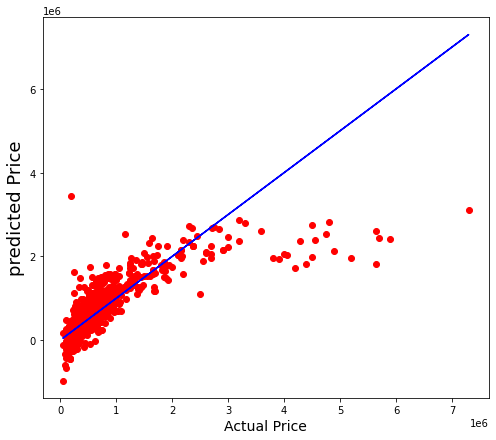

In [265]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price', fontsize= 14 )
plt.ylabel('predicted Price', fontsize= 18)
plt.show()

R2 score: 61.54843981052191   
Cross val Score : 38.982560991310336   
Both the score having very big diffrence, and accurcy errors are high.  

## 3. Ridge

In [266]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=7, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  61.550631671046396
Cross val Score 39.0041604676425


In [267]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 255351.12939144392
Mean Squared Error: 226011758603.90744
Root Mean Square Error: 475406.9400039375


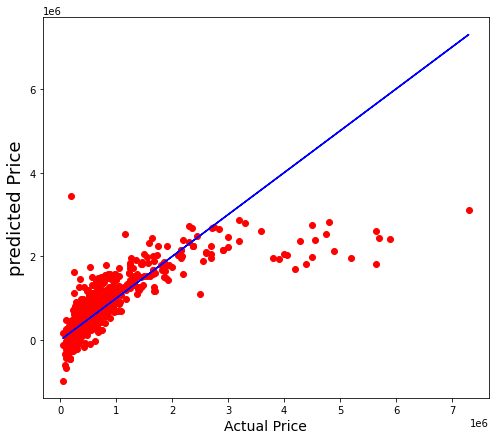

In [270]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price', fontsize= 14 )
plt.ylabel('predicted Price', fontsize= 18)
plt.show()

r2 score:  61.550631671046396  
Cross val Score 39.0041604676425  
Both the score are having big difference, but score is very less, Model Performance is very low.   

### 4. Decision TreeRegressor

In [269]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=7,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 62.30244139966775
Cross Val Score: 51.85951417370348


In [271]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 165255.2907554672
Mean Squared Error: 221592496434.30542
Root Mean Square Error: 470736.12187116616


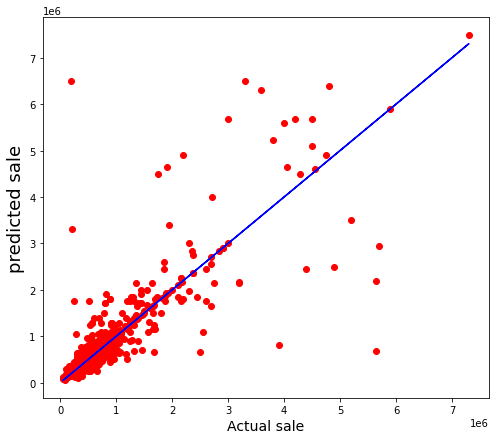

In [272]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 62.30244139966775   
Cross Val Score: 51.85951417370348   
Cross val score increased with Decision Tree regressor, Model accuracy is low.

## 5. KNeighborsRegressor

In [273]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=7, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 62.887201656831
Cross val Score : 59.11216564926674


In [274]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 208719.78946322066
Mean Squared Error: 218155178740.22986
Root Mean Square Error: 467070.8498078529


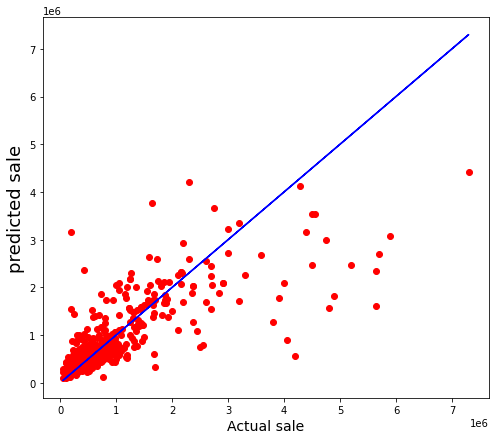

In [275]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 0 62.887201656831  
Cross val Score : 59.11216564926674  
Cross val score is improved with KNeighborsRegressor, Errors are high, lets try another model.

### 6. Ensemble Techniques

### RandomForestRegressor

In [277]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=7, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 83.8211558202369
Cross val Score : 74.80477107339296


In [278]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 120671.18727531694
Mean Squared Error: 95101927136.03847
Root Mean Square Error: 308386.00346974


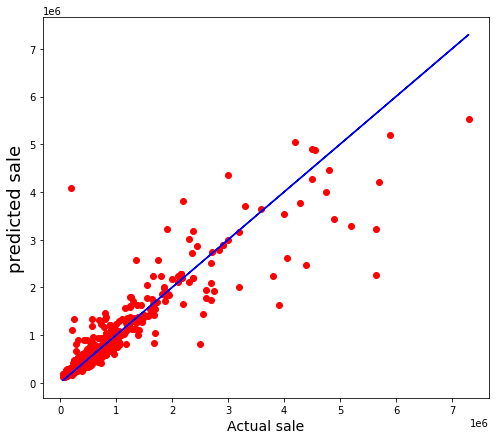

In [279]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 83.8211558202369  
Cross val Score : 74.80477107339296   
Both the score are increased but the diffrence are high, Accuracy is low.

### GradientBoostingRegressor

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=7, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.8211558202369
Cross val Score : 73.45984182496336


In [281]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 120671.18727531694
Mean Squared Error: 95101927136.03847
Root Mean Square Error: 308386.00346974


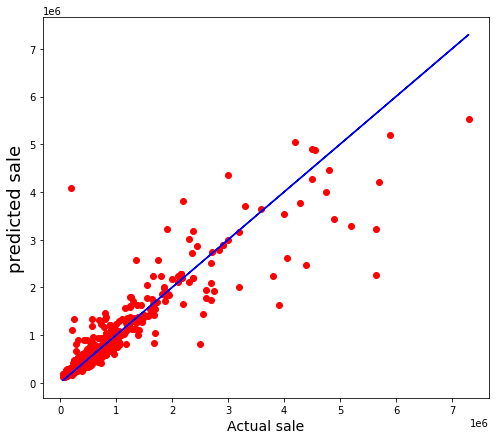

In [282]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 83.8211558202369  
Cross val Score : 73.45984182496336  
Model Performce is Incresed but the diffrence in cross val score is high, Lets try Hyper Tuning.

### Lets Try Hyper Parameter Tuning

##### We will try Hyper parameter Tuning on KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10,15],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree'],'leaf_size':[10,20,30,40,50] }
kn=KNeighborsRegressor()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [286]:
kn=KNeighborsRegressor(algorithm='ball_tree', n_neighbors=5, weights='distance', leaf_size=30)
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: ', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=7)
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score:  66.77000172282929
Cross val Score : 62.44583588444457


We can see still score having consideratble diffrence, lets try another model.

In [287]:
# Random Forest
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[10,20,30,70, 100], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}


In [288]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=4, n_estimators=100)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=7, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 83.86652297746625
Cross val Score : 75.34939131261496


Diffrence in R2 score and Cross val score are still high as compare to KNeighborsRegressor  
KNeighborsRegressor is stil best

# GradientBoostingRegressor hyper parameter tuning. 

In [289]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [290]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=7, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.86652297746625
Cross val Score : 76.49557190233189


Diffrence in R2 score and Cross val score are still high as compare to KNeighborsRegressor
KNeighborsRegressor is stil best

In [292]:
import pickle
filename='Car_Price_Prediction.pkl'
pickle.dump(kn,open(filename,'wb'))

In [293]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(kn.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,650000,620860.8
1,495000,495000.0
2,415000,415000.0
3,2365000,2365000.0
4,475000,524189.2
5,525000,525000.0
6,985000,985000.0
7,1050000,670703.5
8,521000,521000.0
9,245000,245000.0
